# Baseline Mean Shift Segmentation

This notebook looks at the baseline algorithms for the sky segmentation using mean-shift clustering using the following paper: https://arxiv.org/abs/1910.03182

The mean-shift algorithm is a clustering algorithm that is used to find the modes of a density function. It is a non-parametric algorithm that does not require prior knowledge of the number of clusters. The algorithm works by iteratively shifting the mean of the data points to the mean of the points within a given radius. The algorithm is complete when the mean no longer changes.

## Imports

Run once for the whole notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from ipyfilechooser import FileChooser
from IPython.display import clear_output
from scipy.interpolate import griddata

from datamaker import make_image_csv, check_for_corrupted_files
from baseline import baseline_mean_shift, display_results, baseline_mean_shift_third

from constants import DATASET_FOLDER, RESULT_FOLDER

#### Make the CSV file for all the image paths

For information on the dataset: Nice, Kerry A., & Wijnands, Jasper S. (2019). Dataset for: Sky pixel detection in outdoor imagery using an adaptive algorithm and machine learning. [Data set]. In Urban Climate. Zenodo. https://doi.org/10.5281/zenodo.2562396

Run the following functions to create the dataset, which is stored in root directory as "image_paths.csv", refer to README.md for directory structure

In [2]:
make_image_csv(DATASET_FOLDER, "image_paths.csv")
check_for_corrupted_files("image_paths.csv")

IntProgress(value=0, max=38082)

### File Chooser

This allows you to select an image to run the algorithm on

In [3]:
# Create and display a FileChooser widget
fc = FileChooser(DATASET_FOLDER)
display(fc)

FileChooser(path='C:\Users\cjbla\OneDrive\Desktop\Code\data\dataset', filename='', title='', show_hidden=False…

## Main Algorithm

### Mean Shift Segmentation Approach

Library used for the backend algorithm: https://github.com/fjean/pymeanshift

#### Individual Image Testing for top-third

------------------------------------------------------------------------------------------------------------------------
Processing: 162, spatial_radius: 2, range_radius: 2, min_density: 150
Time taken:  0.06600713729858398


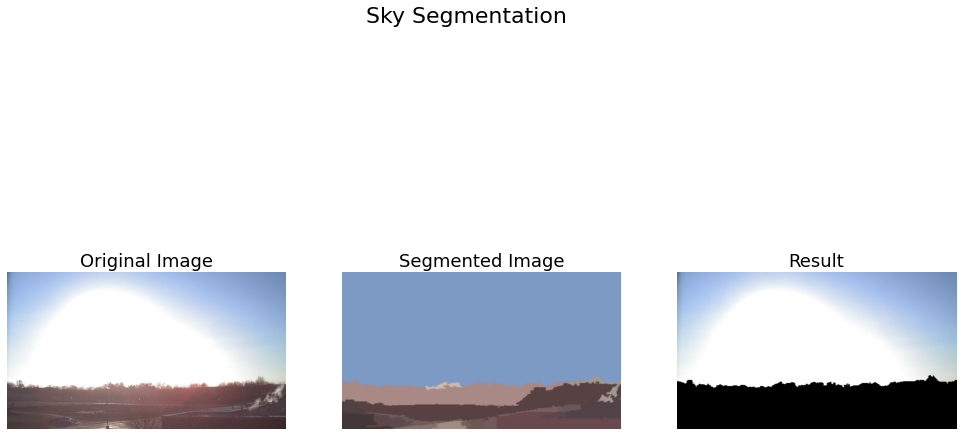

Precision: 0.9774362498091311
Recall: 0.9999875025580701
F1: 0.9885832848788947
------------------------------------------------------------------------------------------------------------------------


In [4]:
_ = display_results(fc.selected, print_mode = 'display',dataset_mode='validate', function=baseline_mean_shift_third)

#### Individual Image Testing for normal

------------------------------------------------------------------------------------------------------------------------
Processing: 162, spatial_radius: 2, range_radius: 2, min_density: 150
Time taken:  0.04700136184692383


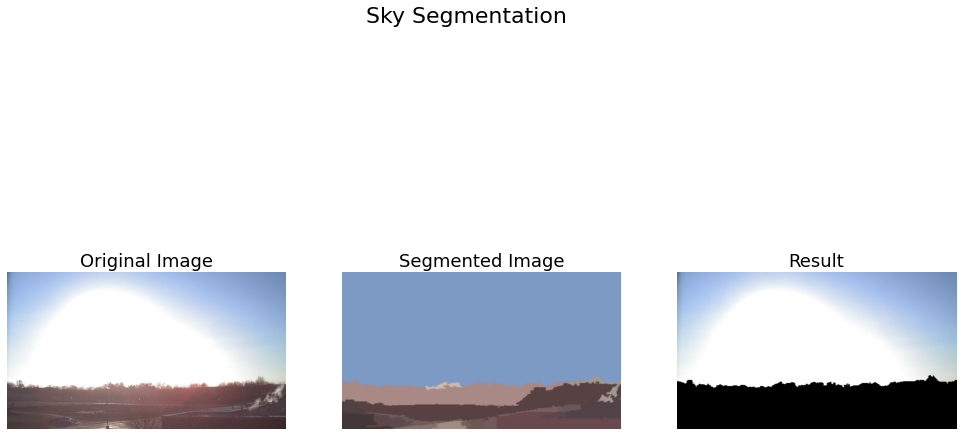

Precision: 0.9774362498091311
Recall: 0.9999875025580701
F1: 0.9885832848788947
------------------------------------------------------------------------------------------------------------------------


In [5]:
_ = display_results(fc.selected, print_mode = 'display',dataset_mode='validate', function=baseline_mean_shift)

### Data for random 100 images

Note: run this only to create the data. This code uses existing data at \analysis_data\results_100.csv. Uncomment the last line to store the results in a CSV.
 
Note: This function takes a long time to run

In [6]:
sr_array = [i for i in range(0, 2, 1)] + [i for i in range(2, 16, 2)]
rr_array = [i for i in range(2, 16, 2)]
min_array = [i for i in range(150, 550, 100)]

results = pd.DataFrame(columns=['precision', 'recall', 'f1', 'filename', 'time_taken', 'spatial_radius', 'range_radius', 'min_density'])
images = pd.read_csv('image_paths.csv')
files = images['image_path'].tolist()

#iterate through 100 random images
random = [np.random.randint(0, len(files)) for i in range(0, 100)]
counter = 0
for i in random:
    counter += 1
    for j in sr_array:
        for k in rr_array:
            for l in min_array:
                clear_output(wait=True)
                print("File Number " + str(counter) + "/100 - " + str(files[i]) + "\nspatial_radius=" + str(j) + ": \n     range_radius=" + str(k) + ": \n          min_density=" + str(l) + ": ")
                results.loc[len(results)] = display_results(files[i], baseline_mean_shift, print_mode = 'not_display', dataset_mode='validate', spatial_radius=j, range_radius=k, min_density=l)

#remove all nan values from results
results = results.dropna()

#save the results to a csv file
#results.to_csv(RESULT_FOLDER + 'results_100.csv')

File Number 10/100 - C:\Users\cjbla\OneDrive\Desktop\Code\data\dataset\original\OriginalImages\8733\20130922_143640.jpg
spatial_radius=14: 
     range_radius=14: 
          min_density=450: 


### Importing the saved result data

For Results ranging from 0 to 14 for Spatial Radius, 2 to 14 Color Range Radius and 150  to 450 minimum density

In [20]:
sr_array = [i for i in range(0, 2, 1)] + [i for i in range(2, 16, 2)]
rr_array = [i for i in range(2, 16, 2)]
min_array = [i for i in range(150, 550, 100)]

#import the results from the csv file with the first column as the index
results = pd.read_csv(RESULT_FOLDER + 'results_100.csv')

### Display the results in 3D

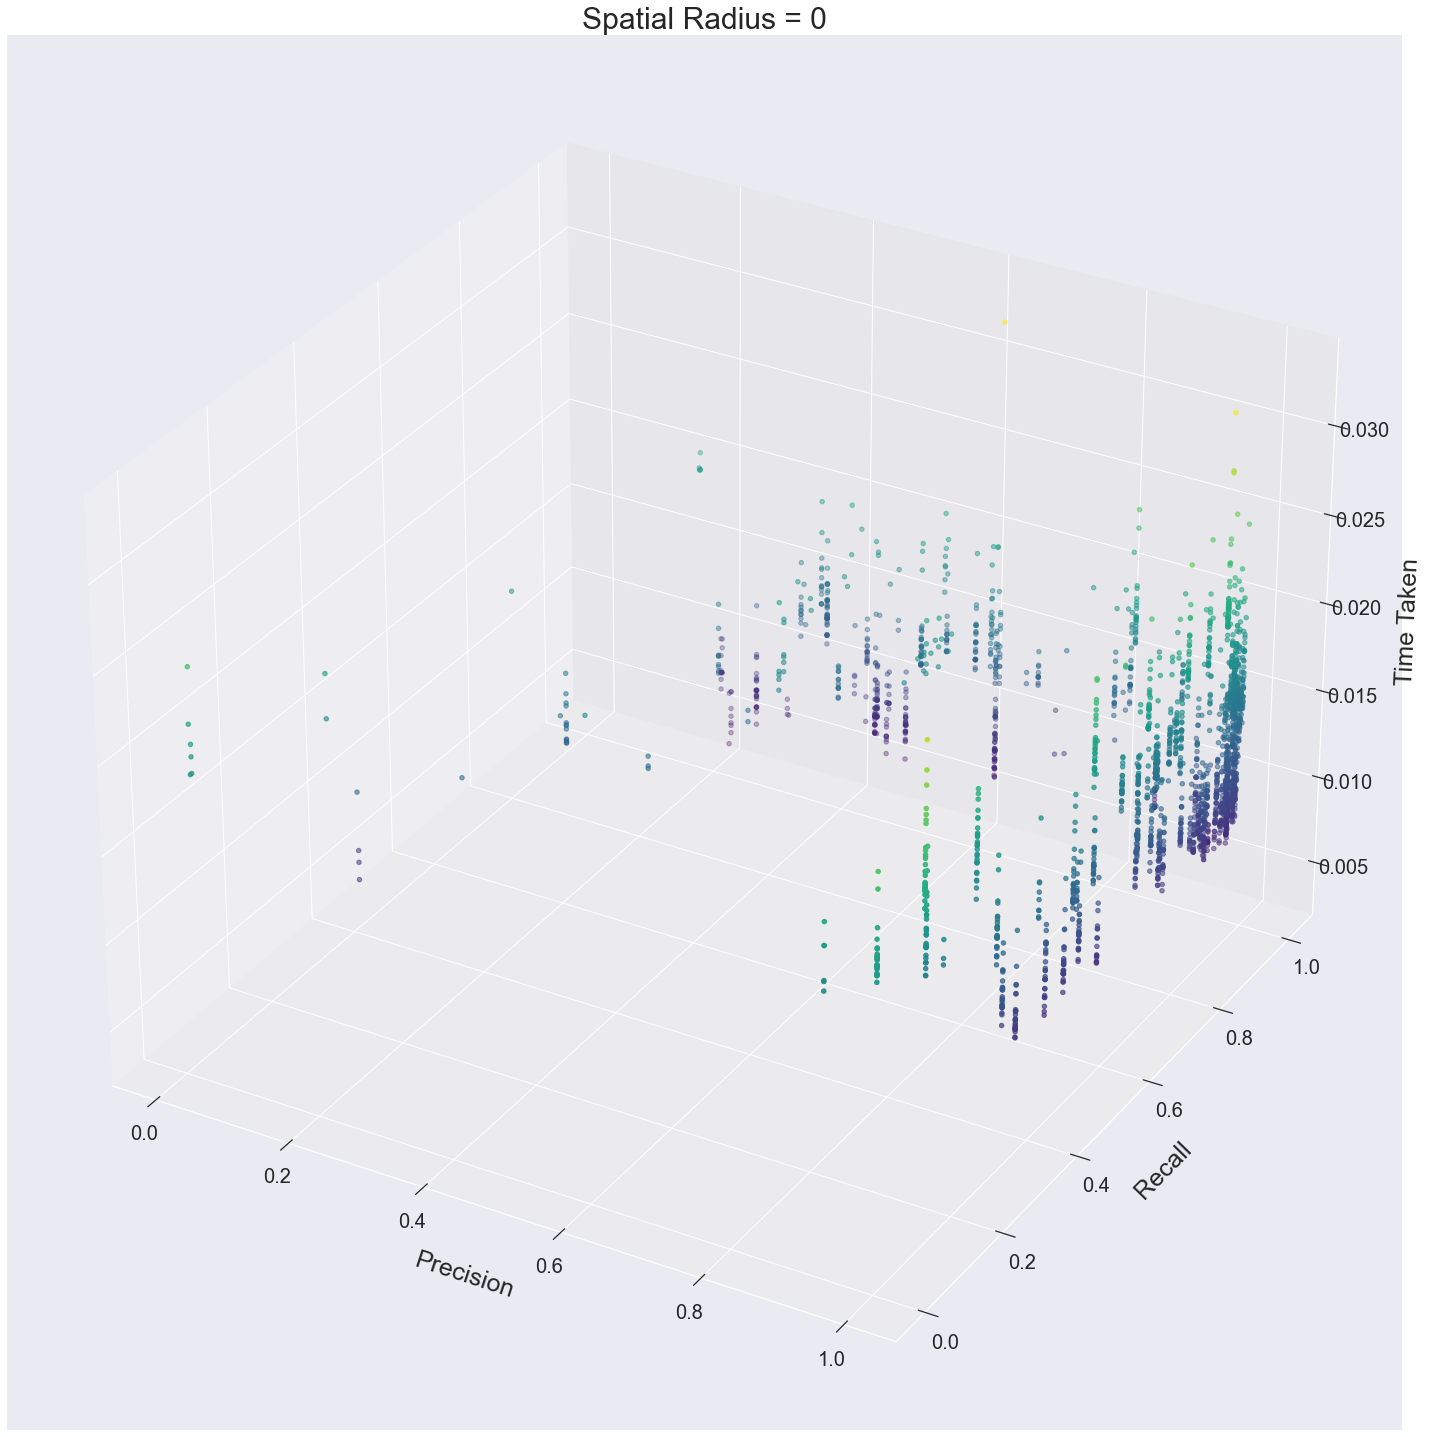

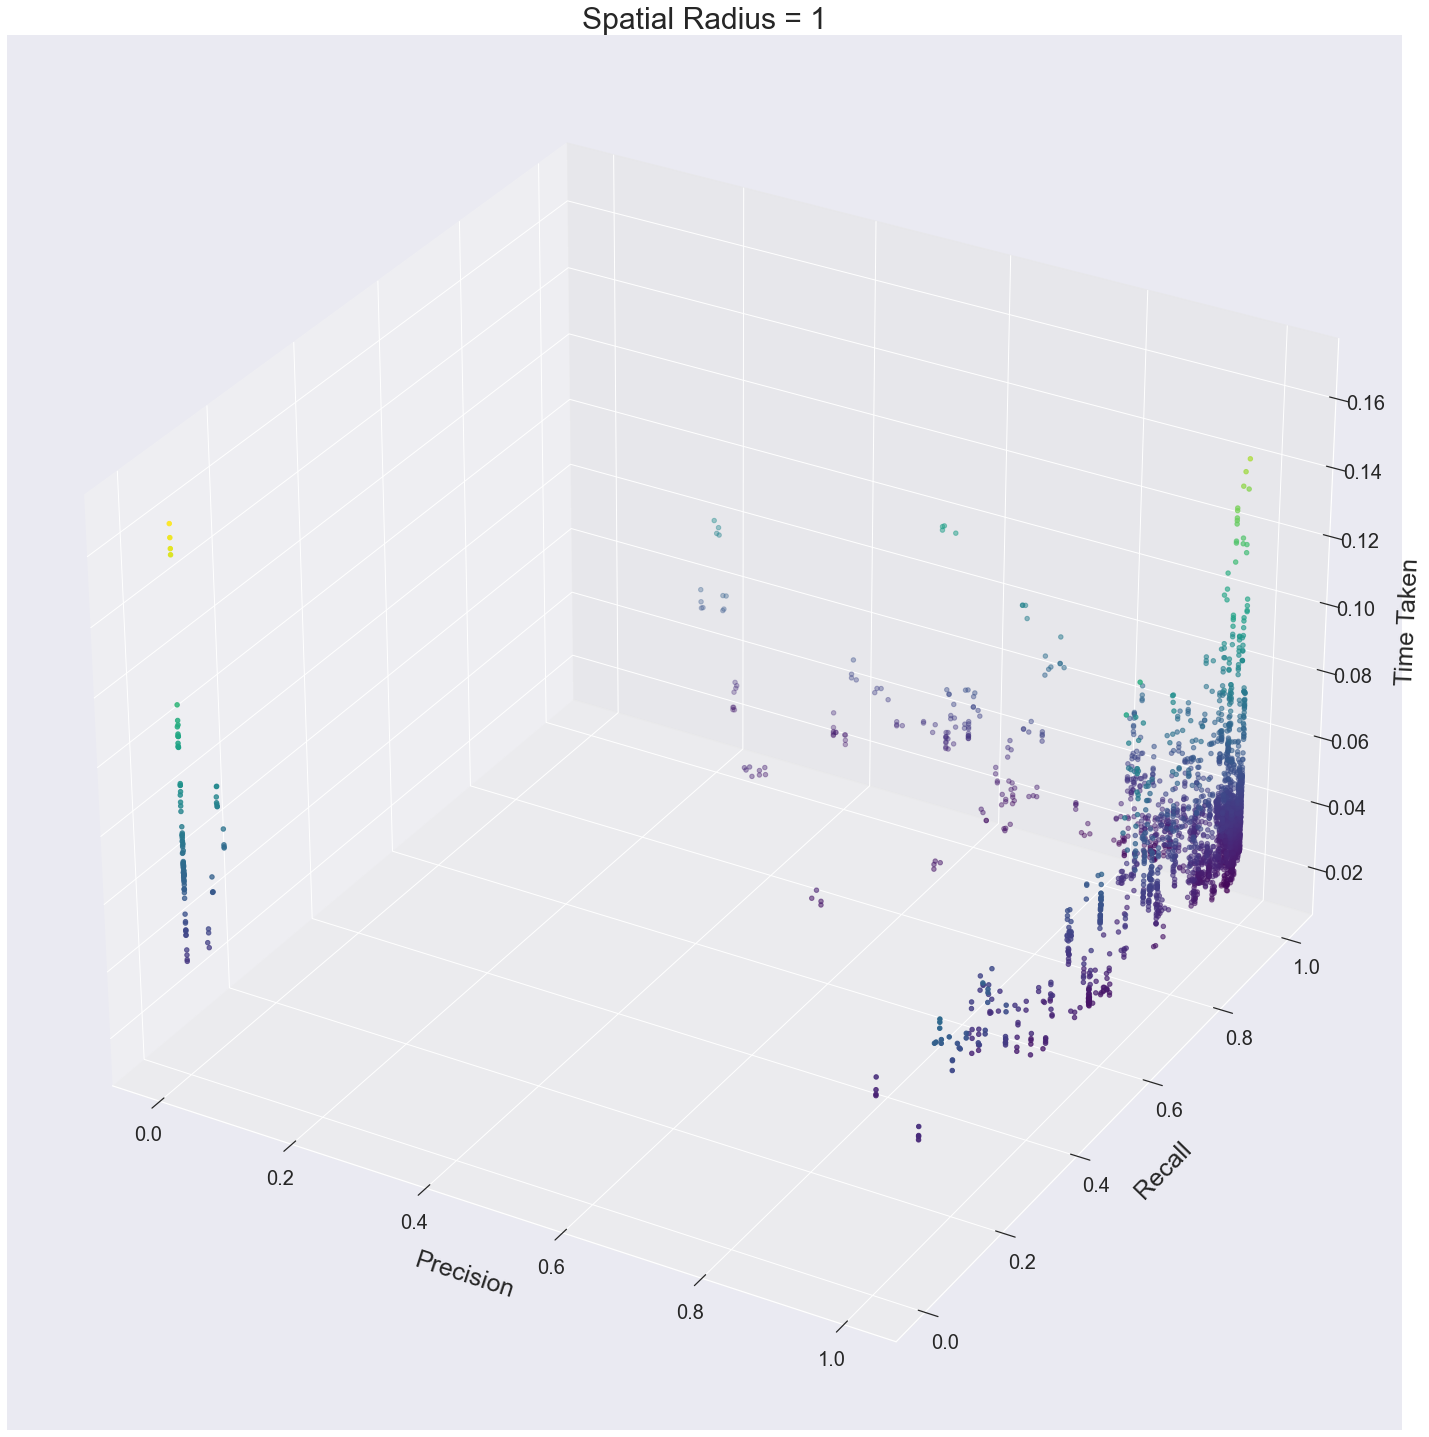

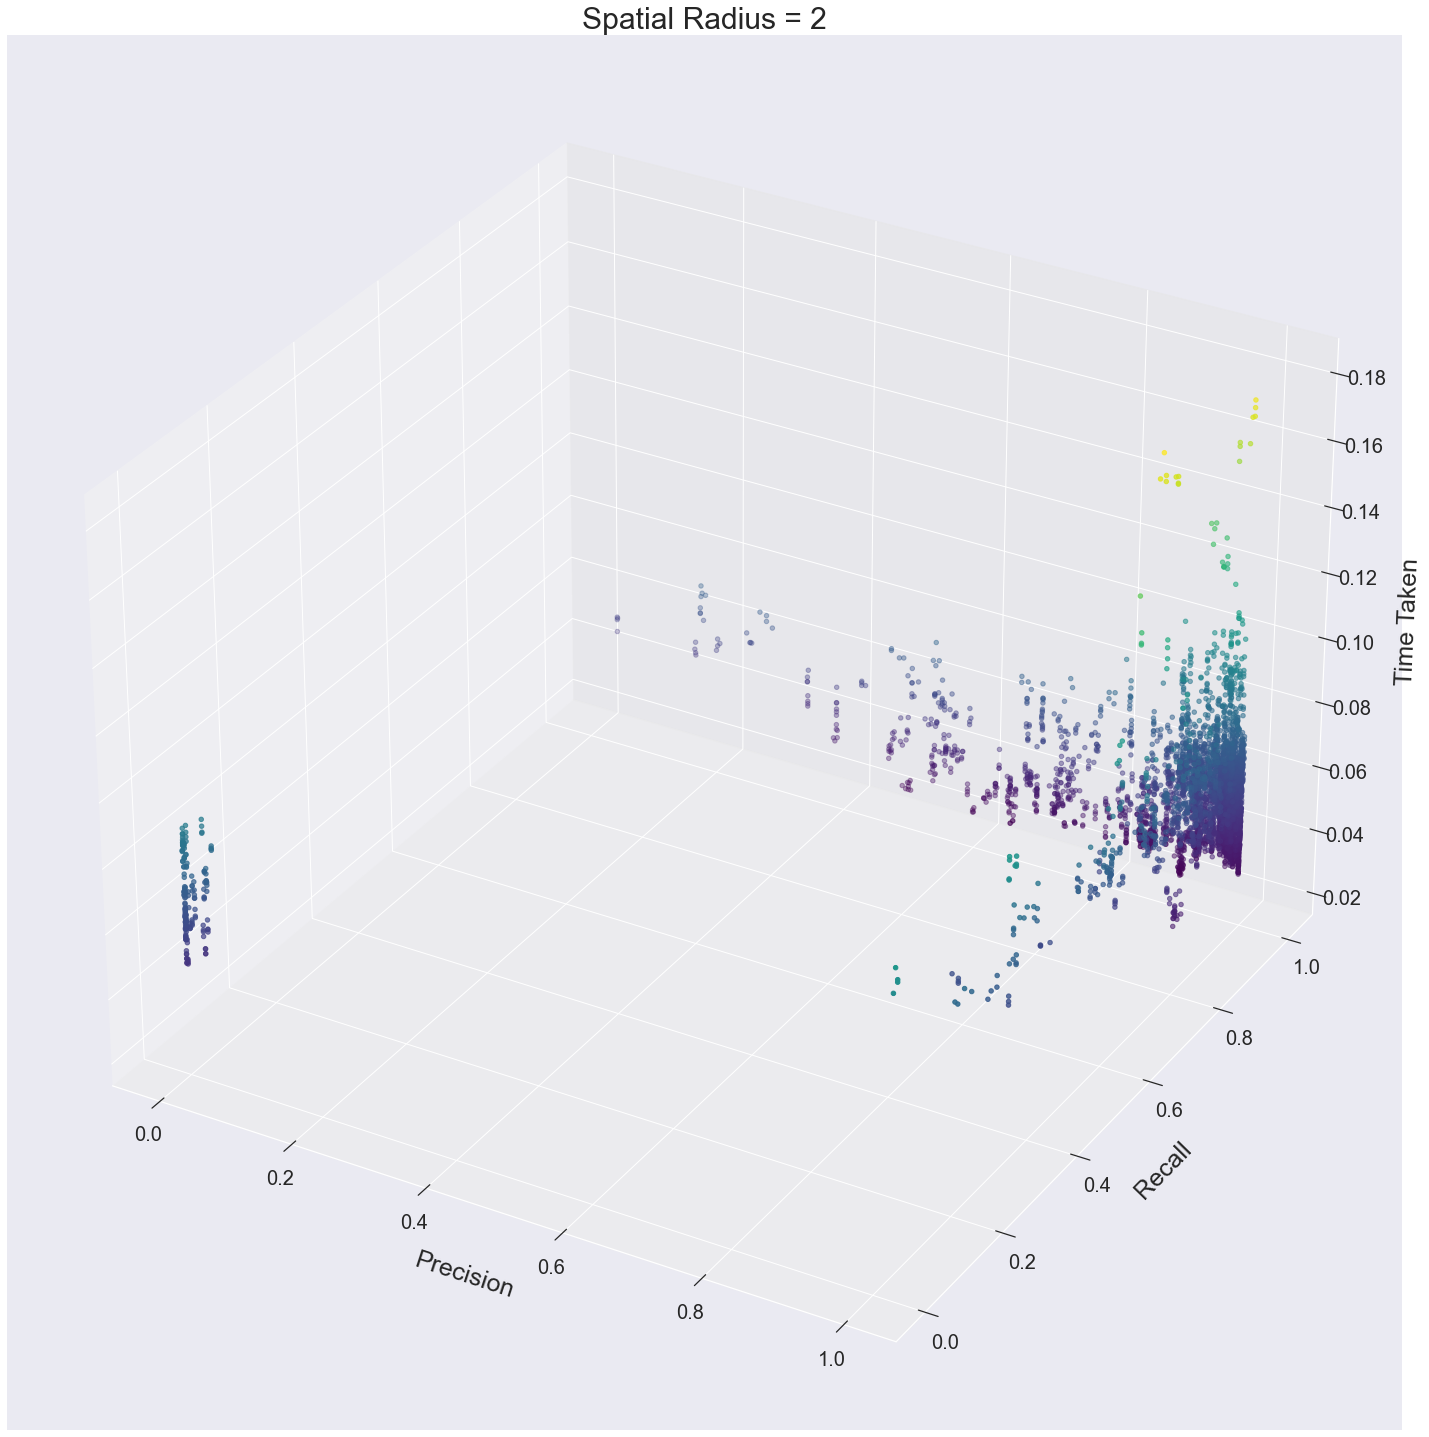

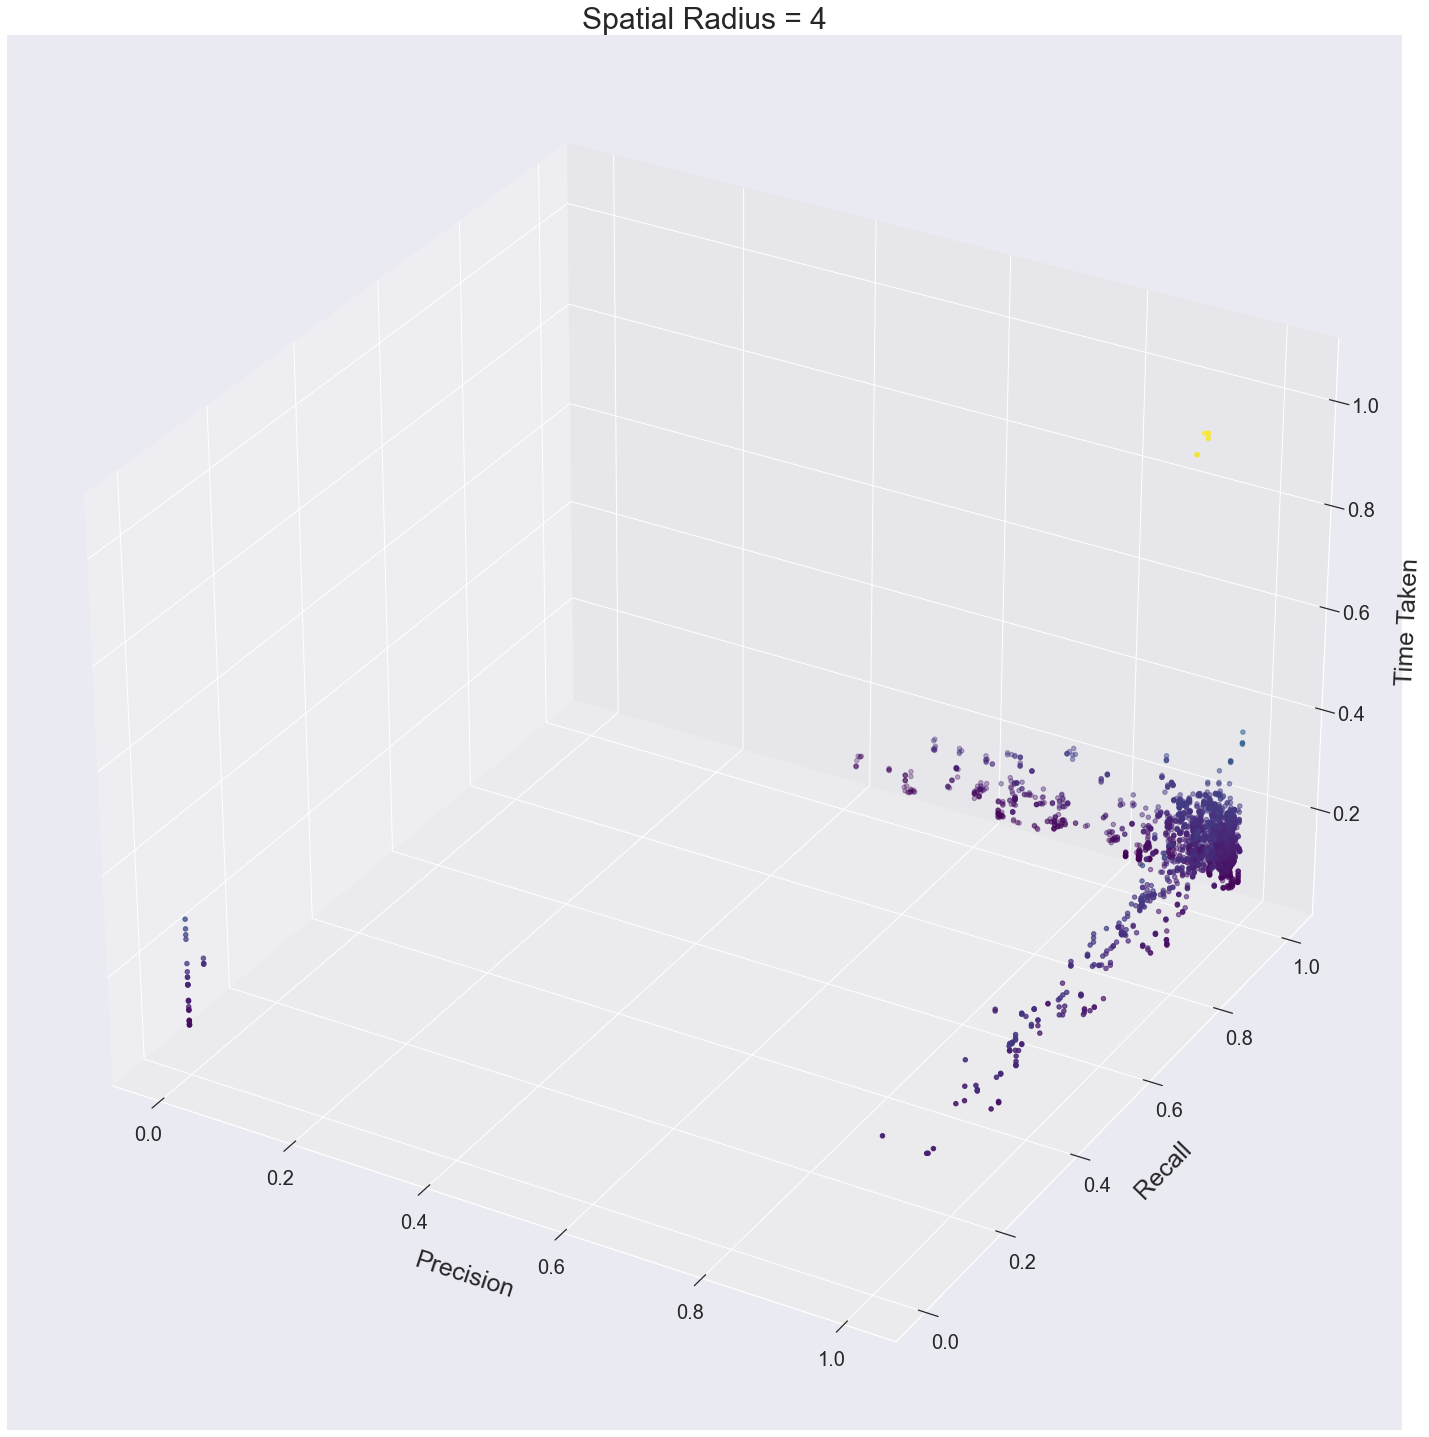

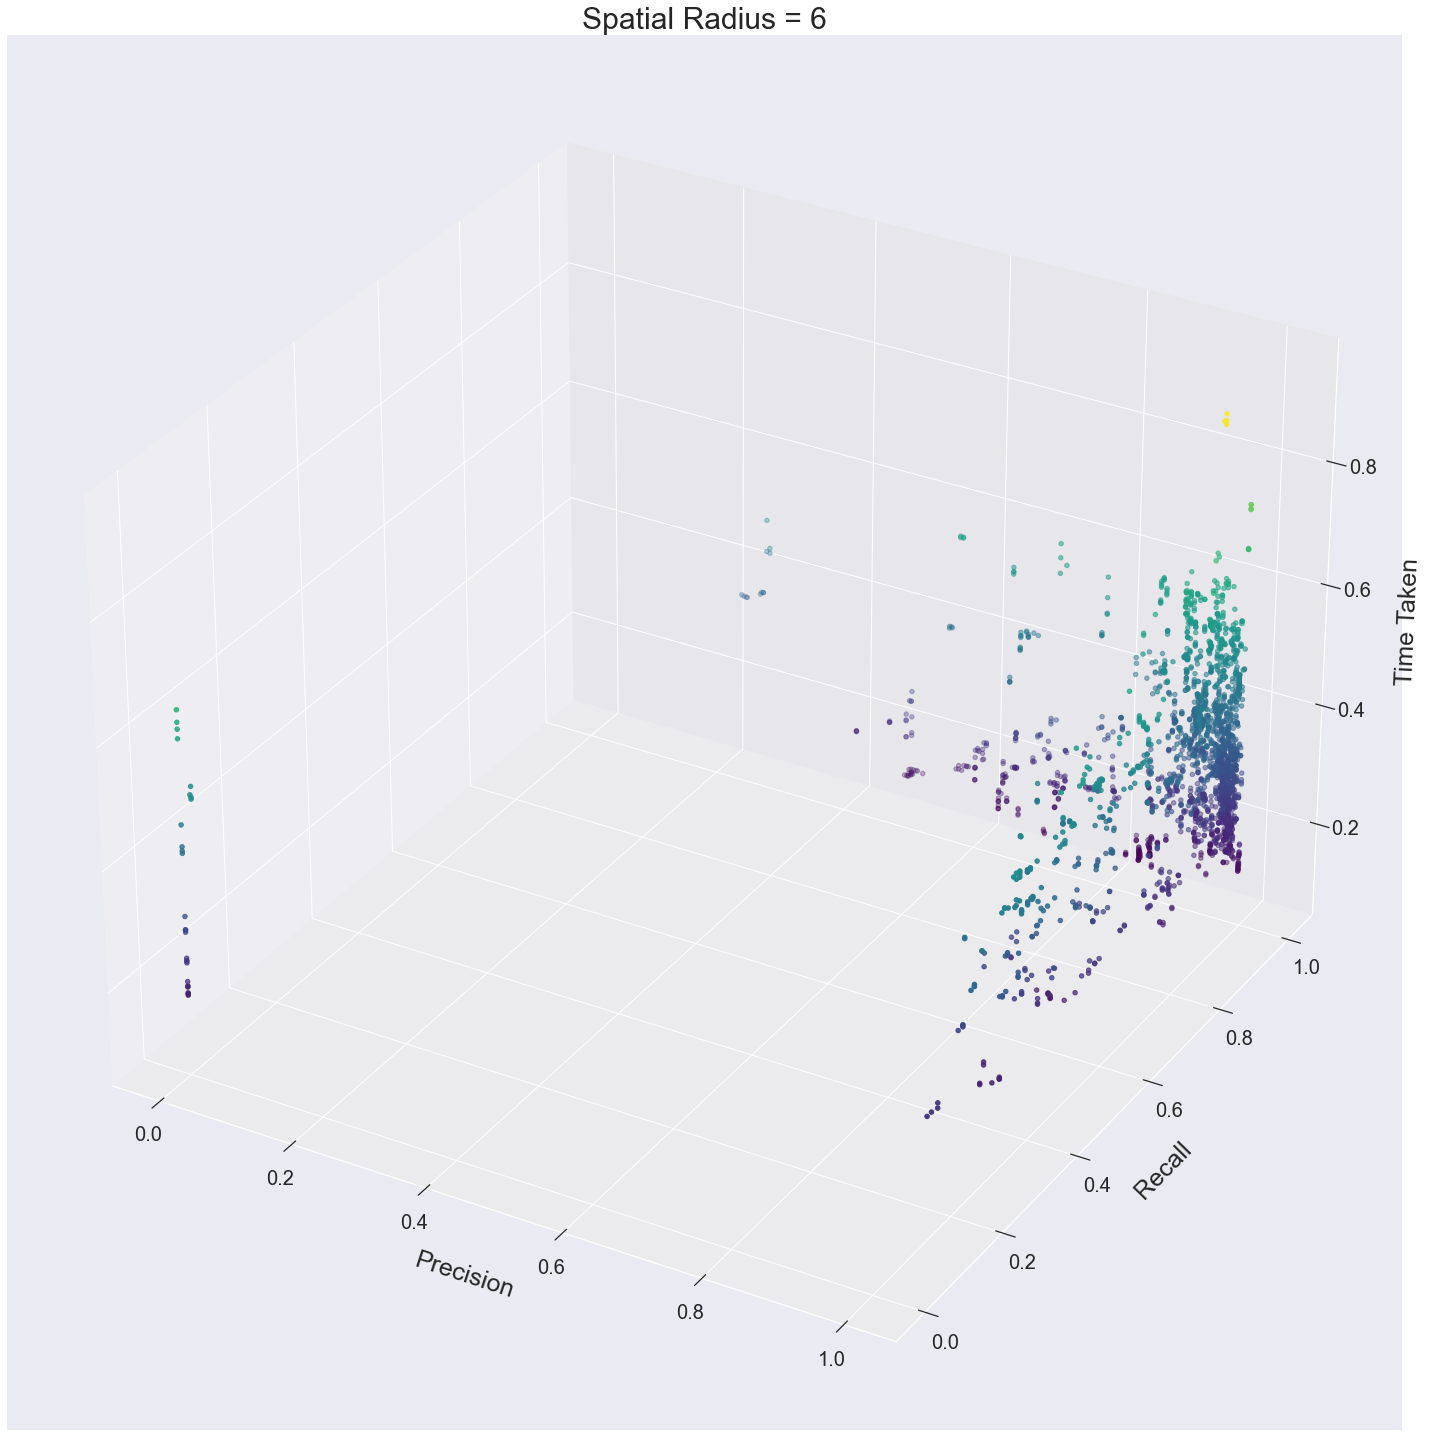

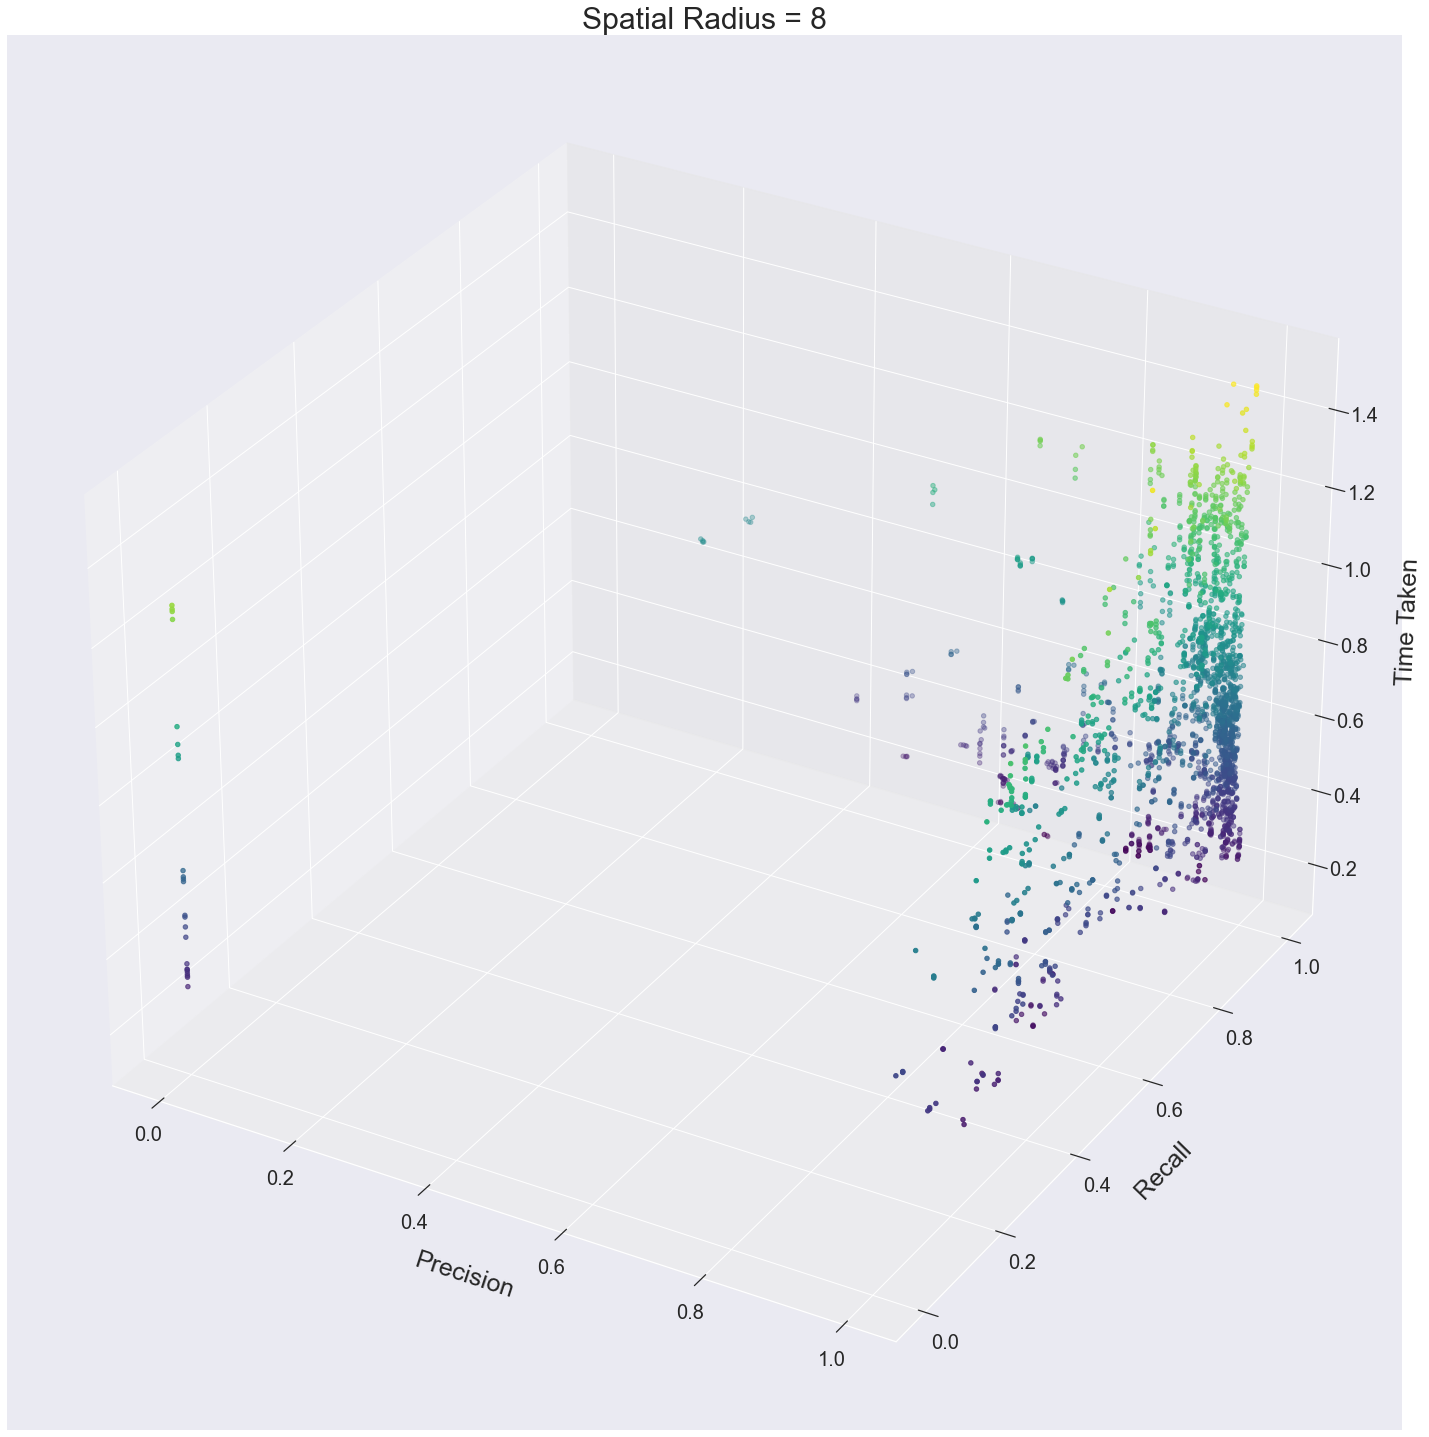

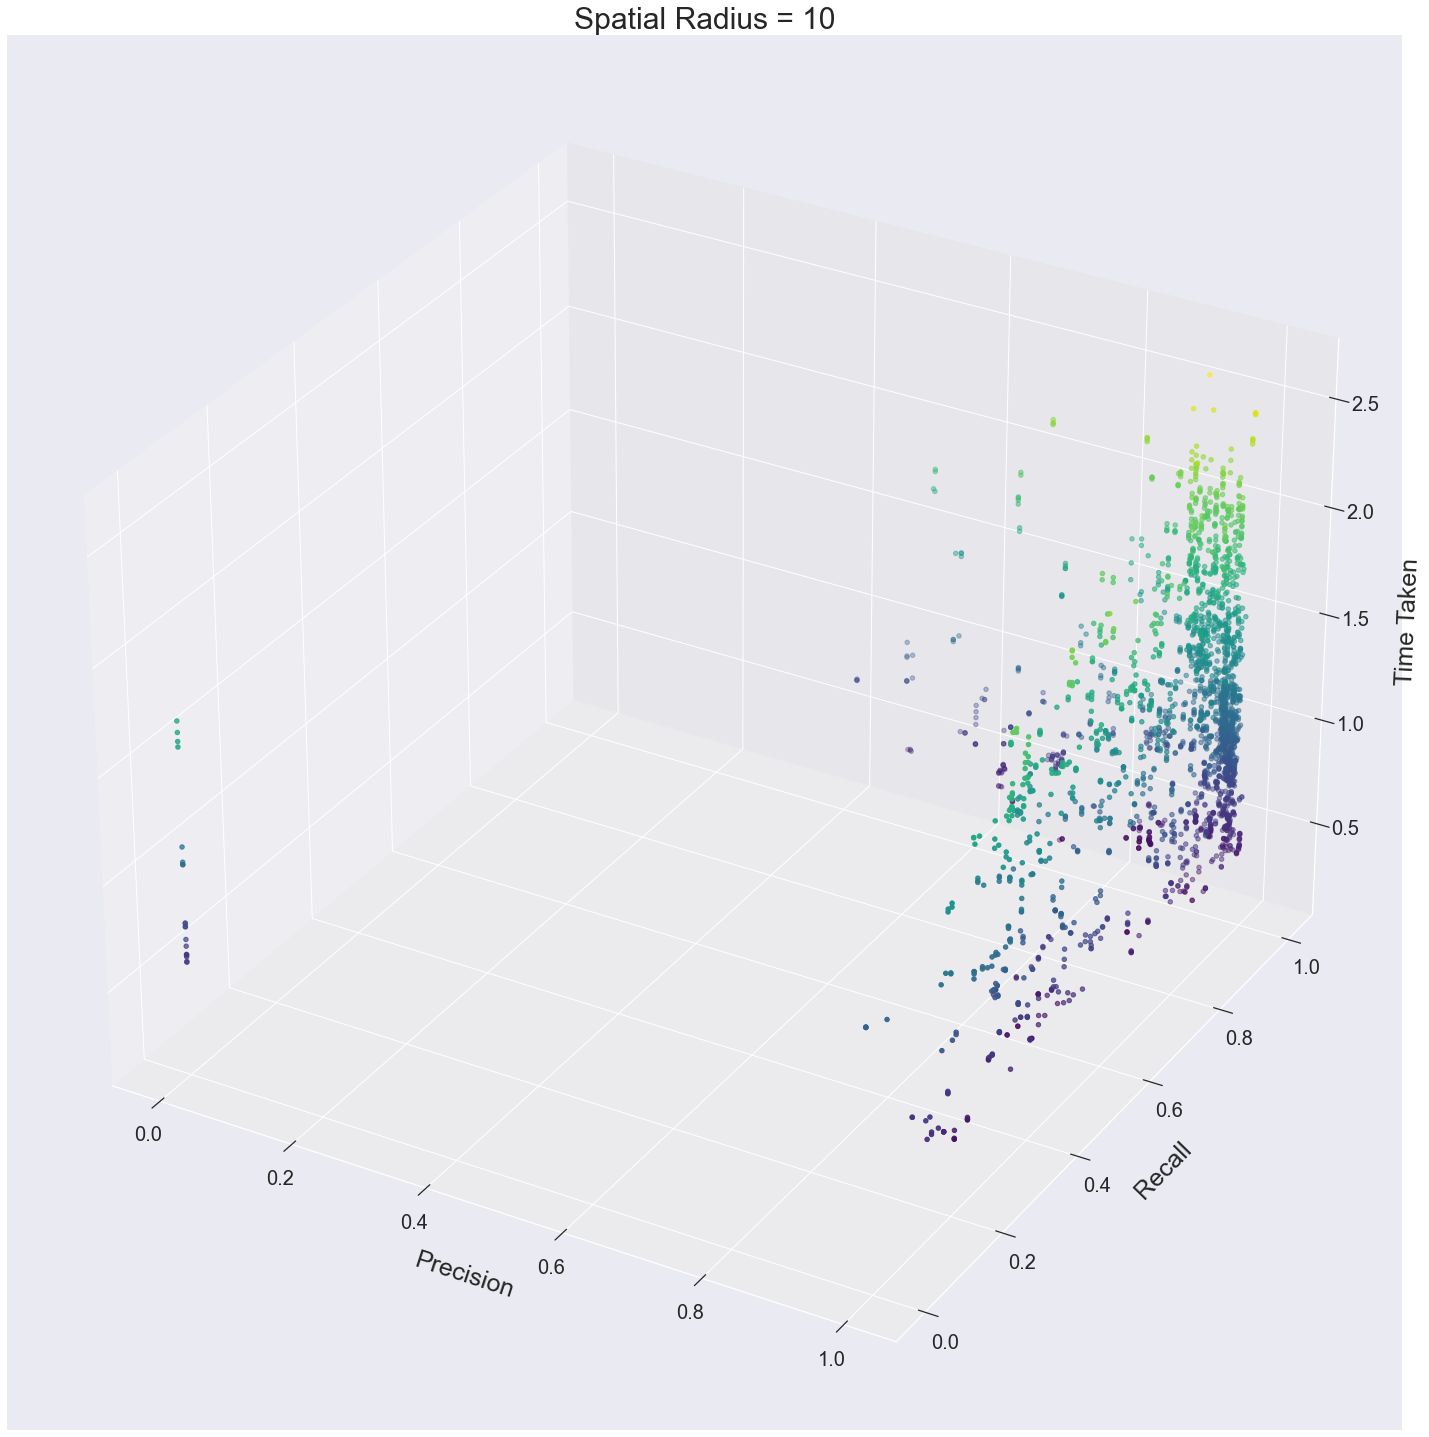

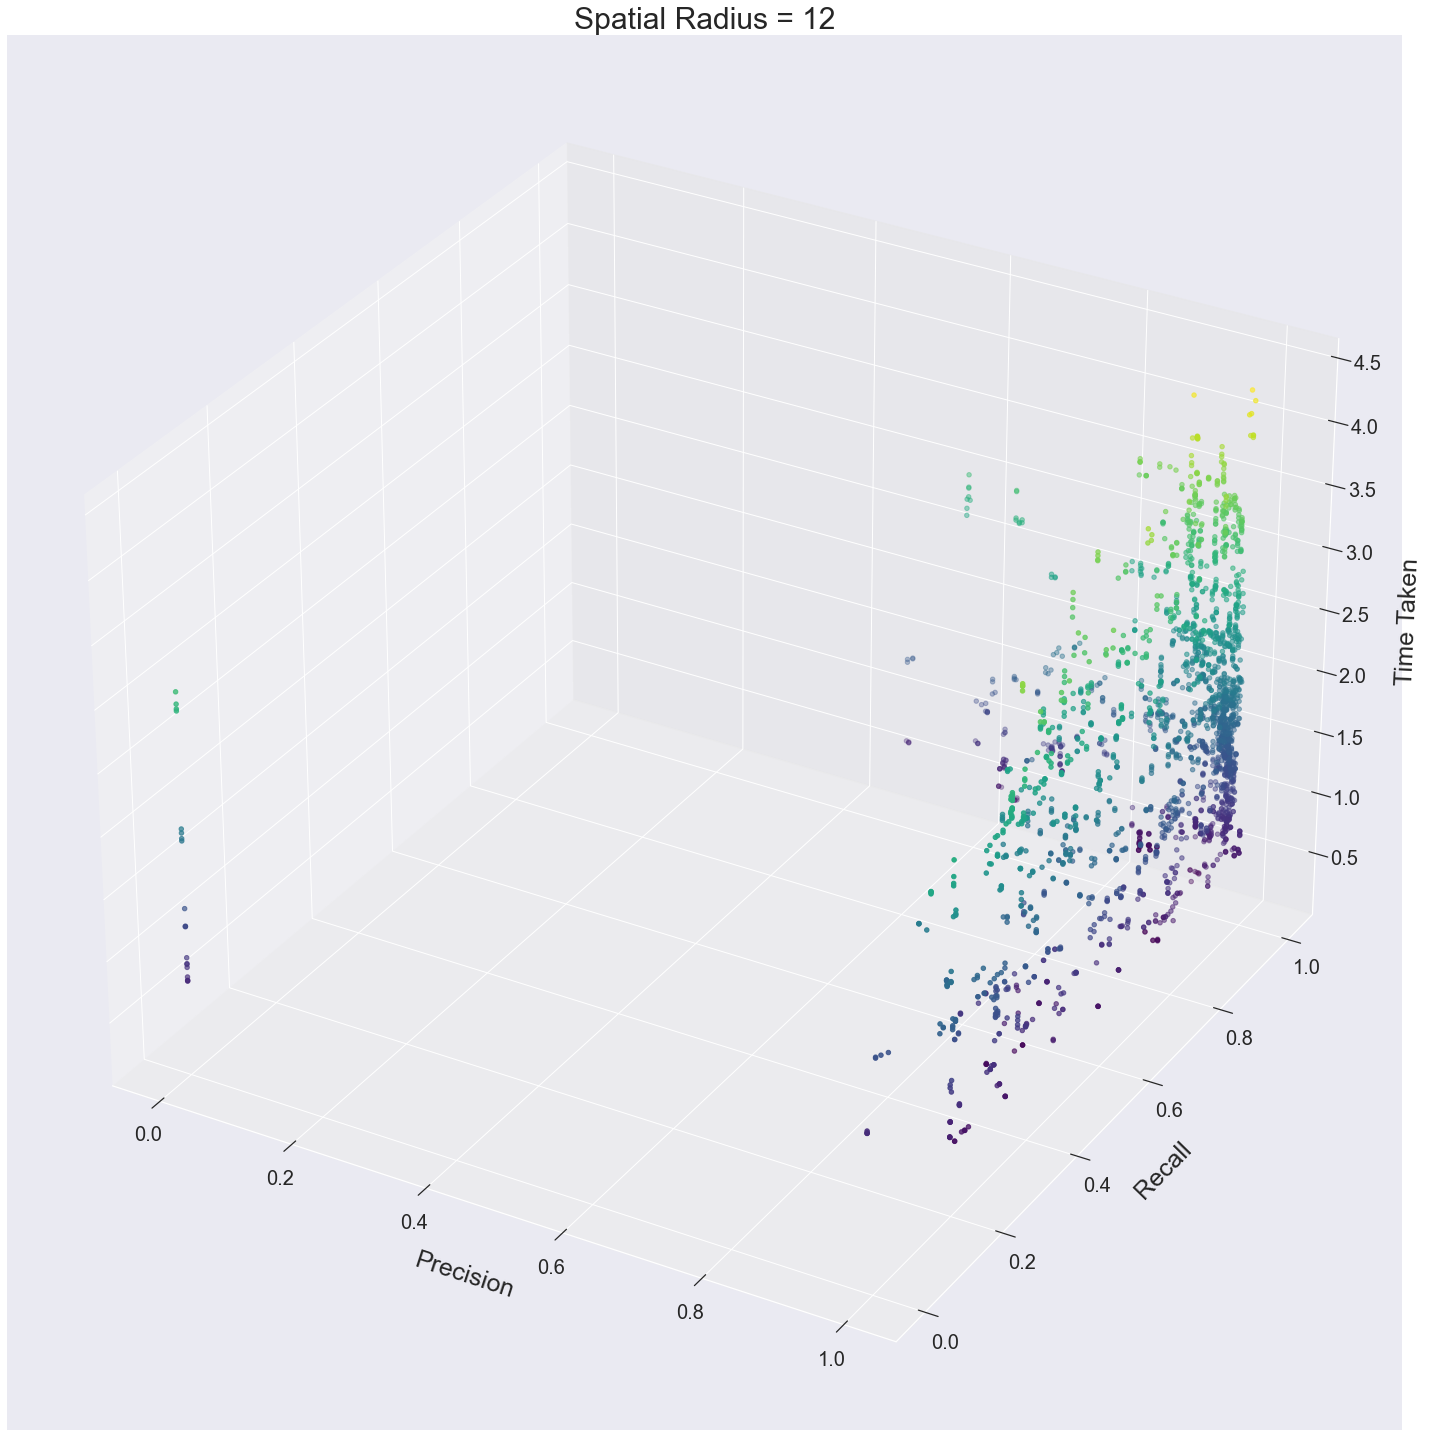

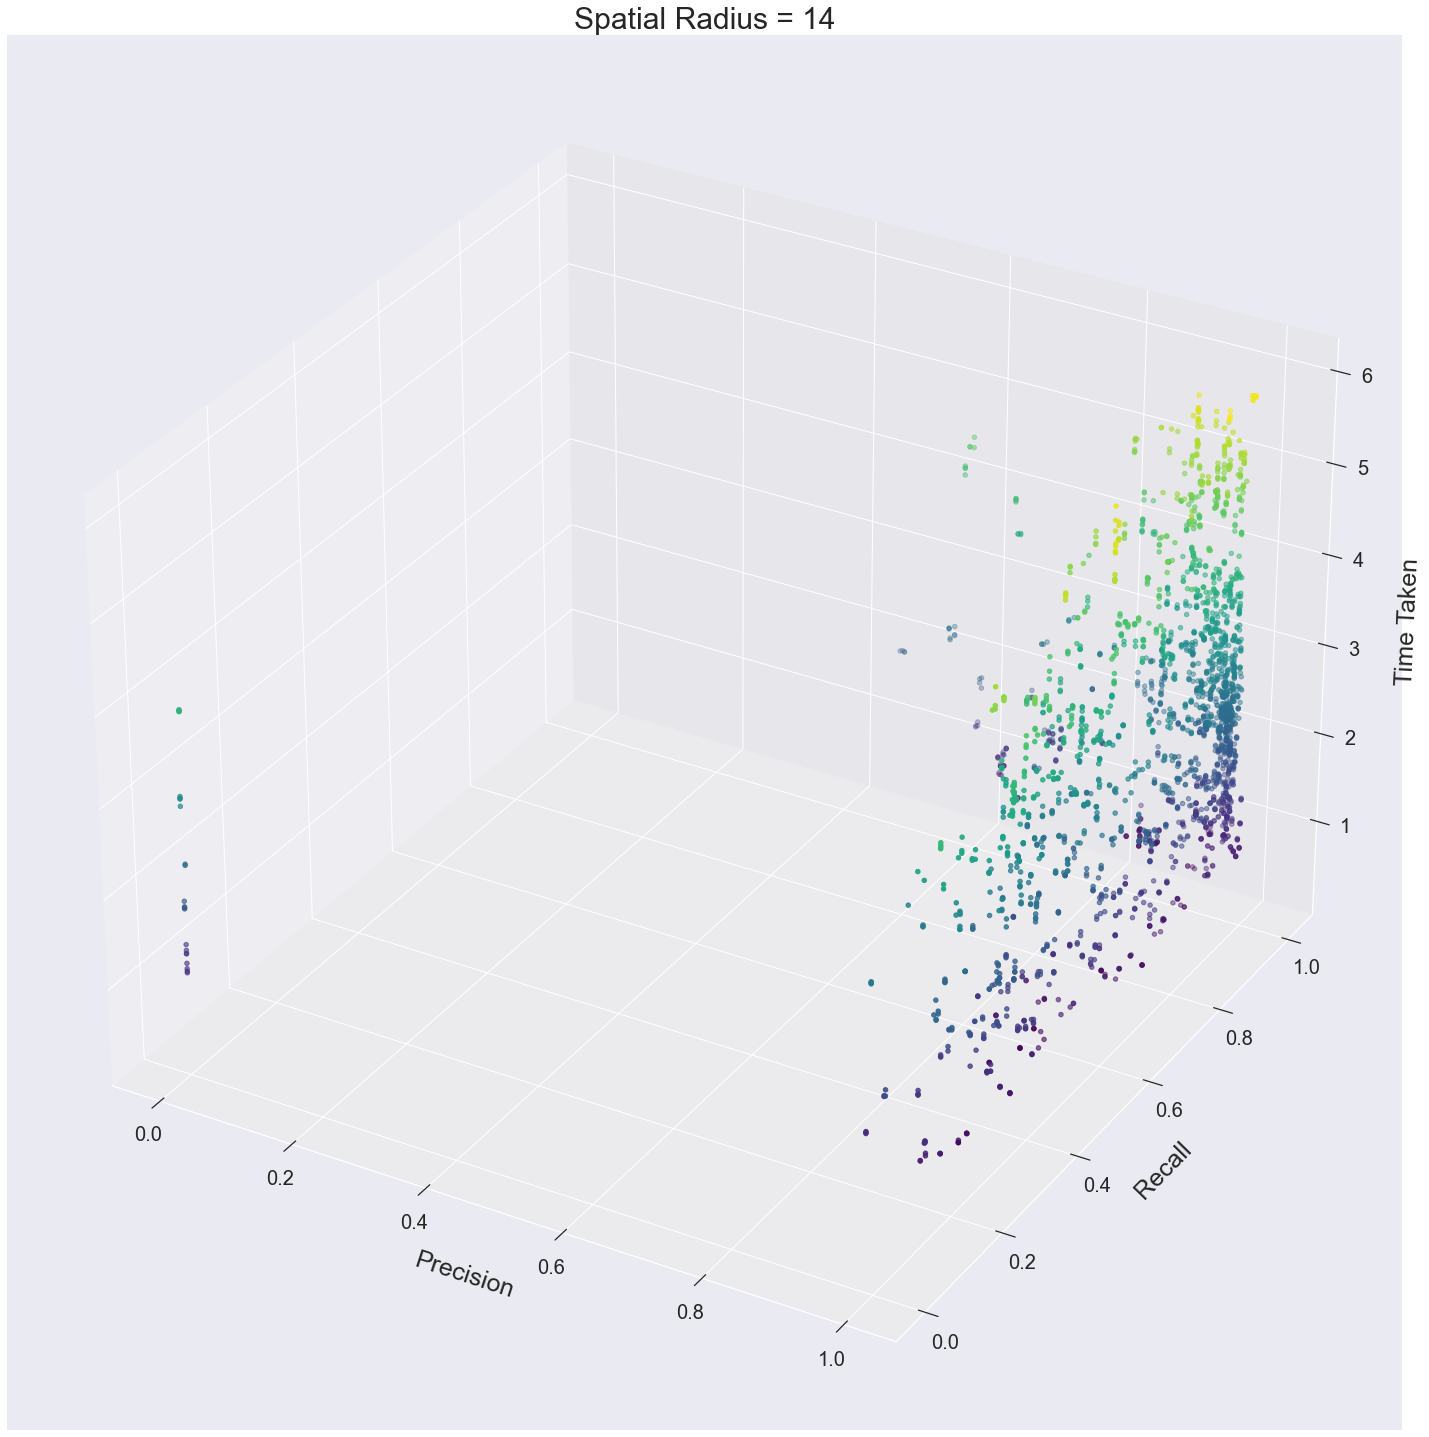

In [21]:
#make a 3d plot of the result for precision, recall and time taken for each spatial_radius
for i in sr_array:
    fig = plt.figure(figsize=(25, 30))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(results['precision'][results['spatial_radius'] == i], results['recall'][results['spatial_radius'] == i], results['time_taken'][results['spatial_radius'] == i], c=results['time_taken'][results['spatial_radius'] == i], cmap='viridis')
    ax.set_xlabel('Precision', fontsize=25, labelpad=25)
    ax.set_ylabel('Recall', fontsize=25, labelpad=25)
    ax.set_zlabel('Time Taken', fontsize=25, labelpad=30)
    ax.set_title('Spatial Radius = ' + str(i), fontsize=30)
    ax.tick_params(axis='x', labelsize=20, pad=10)
    ax.tick_params(axis='y', labelsize=20, pad=10)
    ax.tick_params(axis='z', labelsize=20, pad=10)
    plt.show()

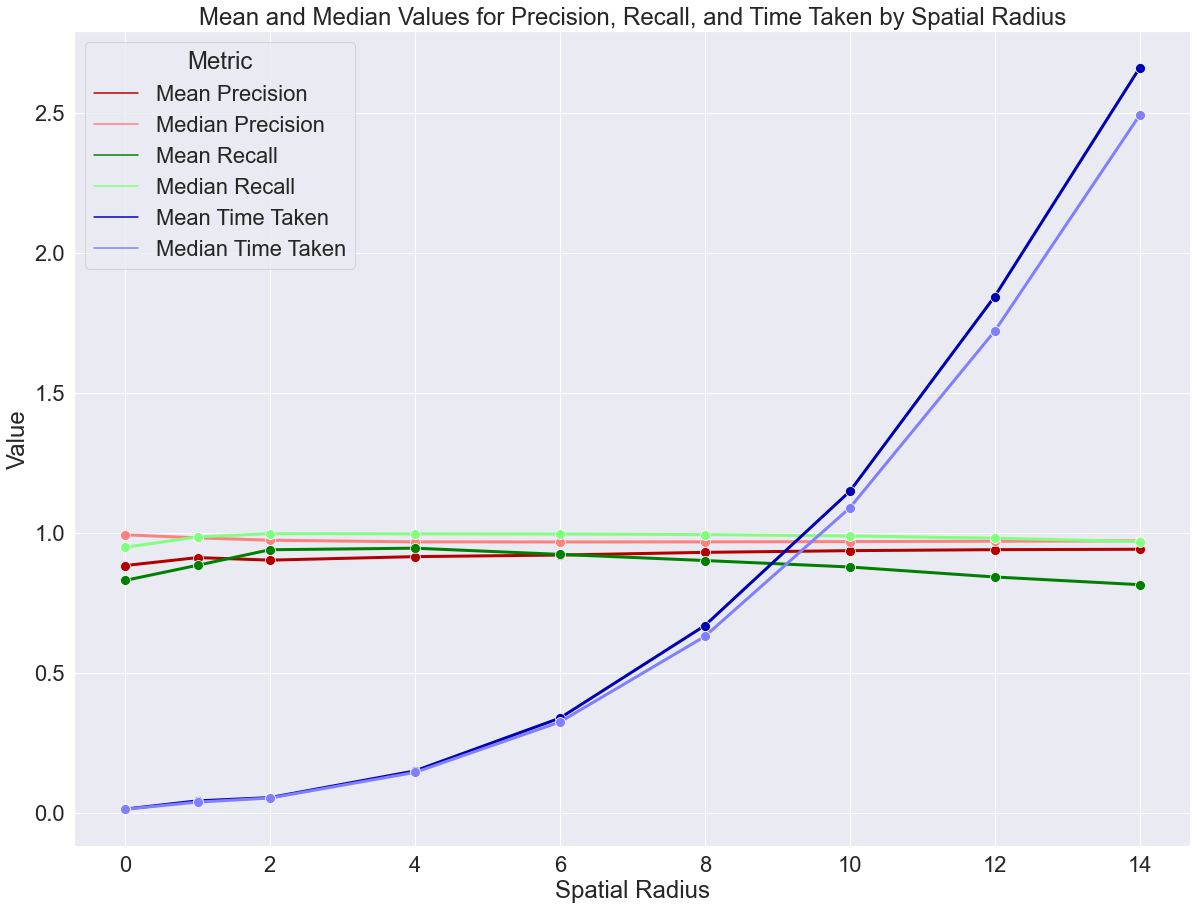

In [22]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv(RESULT_FOLDER + 'results_100.csv')

# Group the dataframe by spatial radius
grouped = df.groupby('spatial_radius')

# Calculate the mean and median values for precision, recall, and time_taken for each group
mean_precision = grouped['precision'].mean()
median_precision = grouped['precision'].median()
mean_recall = grouped['recall'].mean()
median_recall = grouped['recall'].median()
mean_time_taken = grouped['time_taken'].mean()
median_time_taken = grouped['time_taken'].median()

# Create a dataframe with the mean and median values for each group
data = pd.DataFrame({
    'Spatial Radius': mean_precision.index,
    'Mean Precision': mean_precision.values,
    'Median Precision': median_precision.values,
    'Mean Recall': mean_recall.values,
    'Median Recall': median_recall.values,
    'Mean Time Taken': mean_time_taken.values,
    'Median Time Taken': median_time_taken.values
})

# Melt the dataframe to create a long-form dataset
melted_data = pd.melt(data, id_vars=['Spatial Radius'], var_name='Metric', value_name='Value')

# Create a line plot with mean and median values for precision, recall, and time_taken for each group
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
sns.set_palette([
    (0.7, 0, 0), (1, 0.5, 0.5), # Dark red and light red for mean precision and median precision
    (0, 0.5, 0), (0.5, 1, 0.5), # Dark green and light green for mean recall and median recall
    (0, 0, 0.7), (0.5, 0.5, 1)  # Dark blue and light blue for mean time taken and median time taken
])
sns.lineplot(x='Spatial Radius', y='Value', hue='Metric', data=melted_data, linewidth=3, marker='o', markersize=10)
plt.xlabel('Spatial Radius')
plt.ylabel('Value')
plt.title('Mean and Median Values for Precision, Recall, and Time Taken by Spatial Radius')
plt.show()

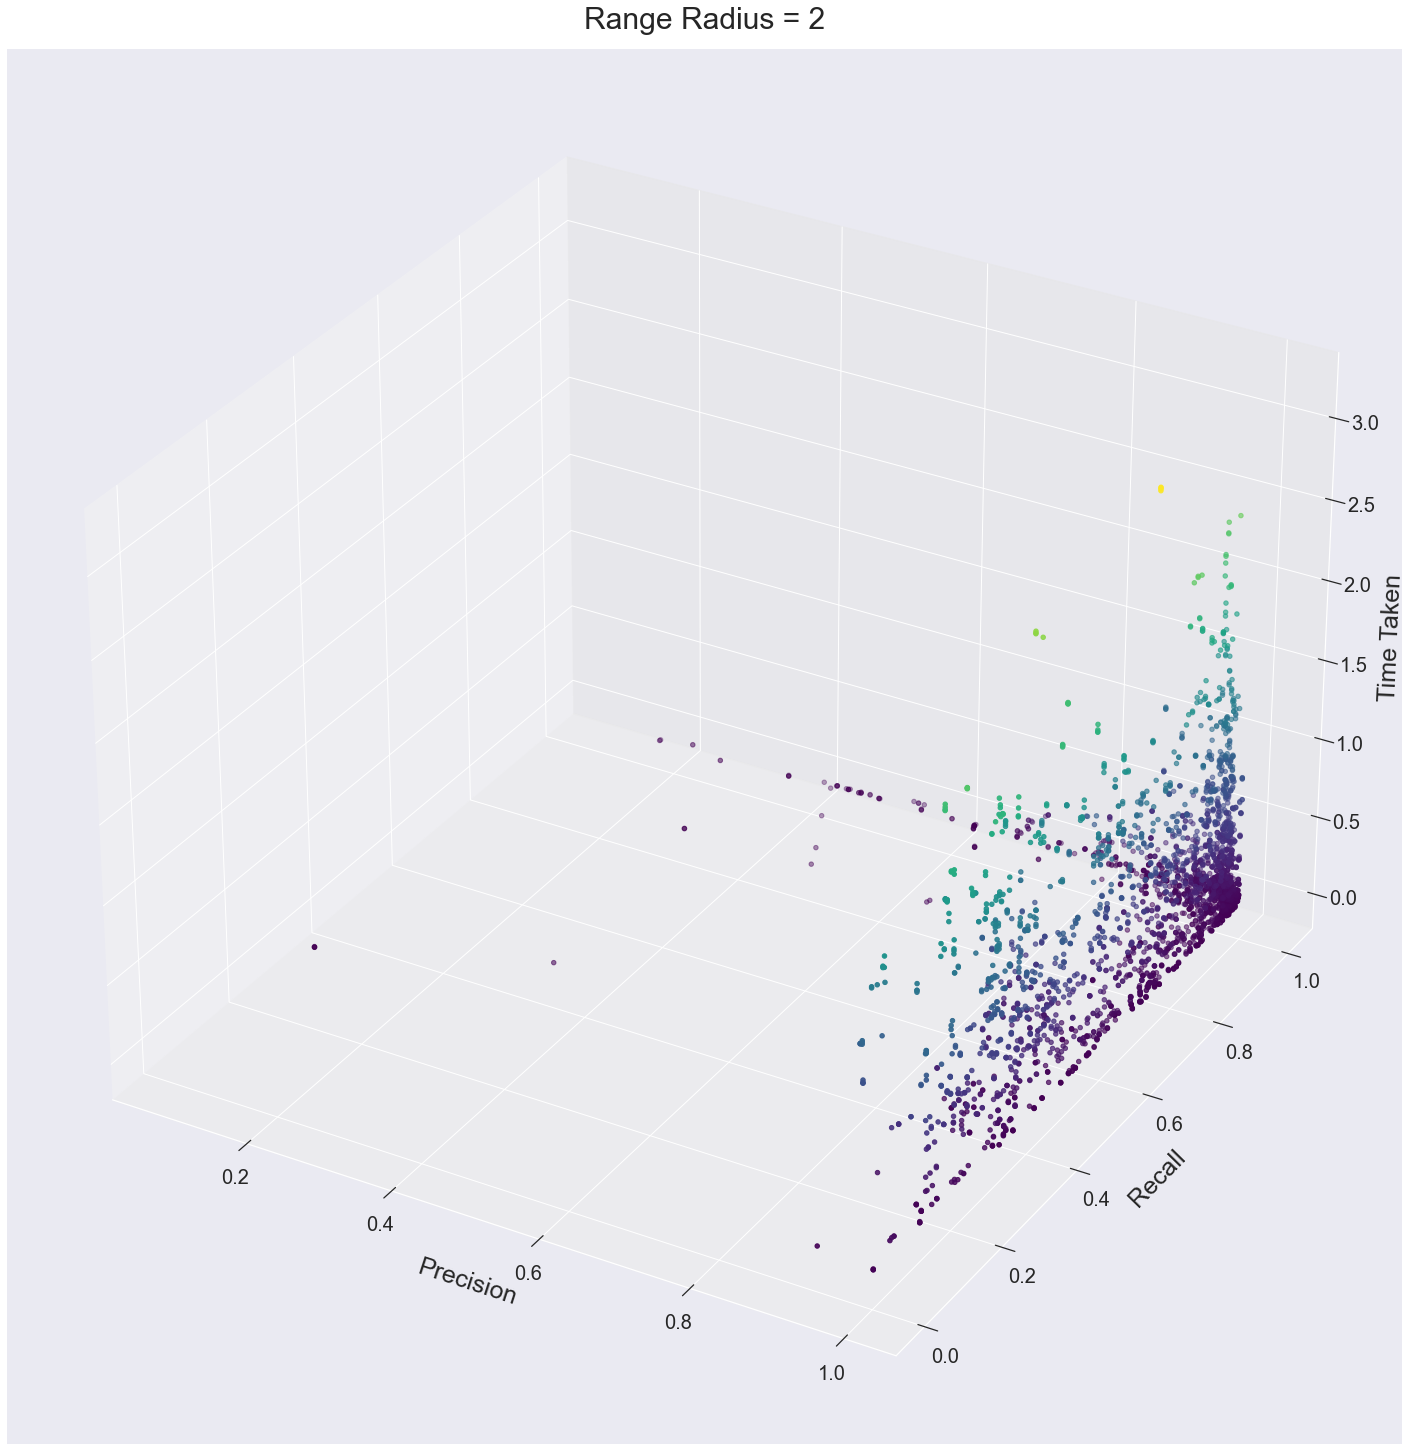

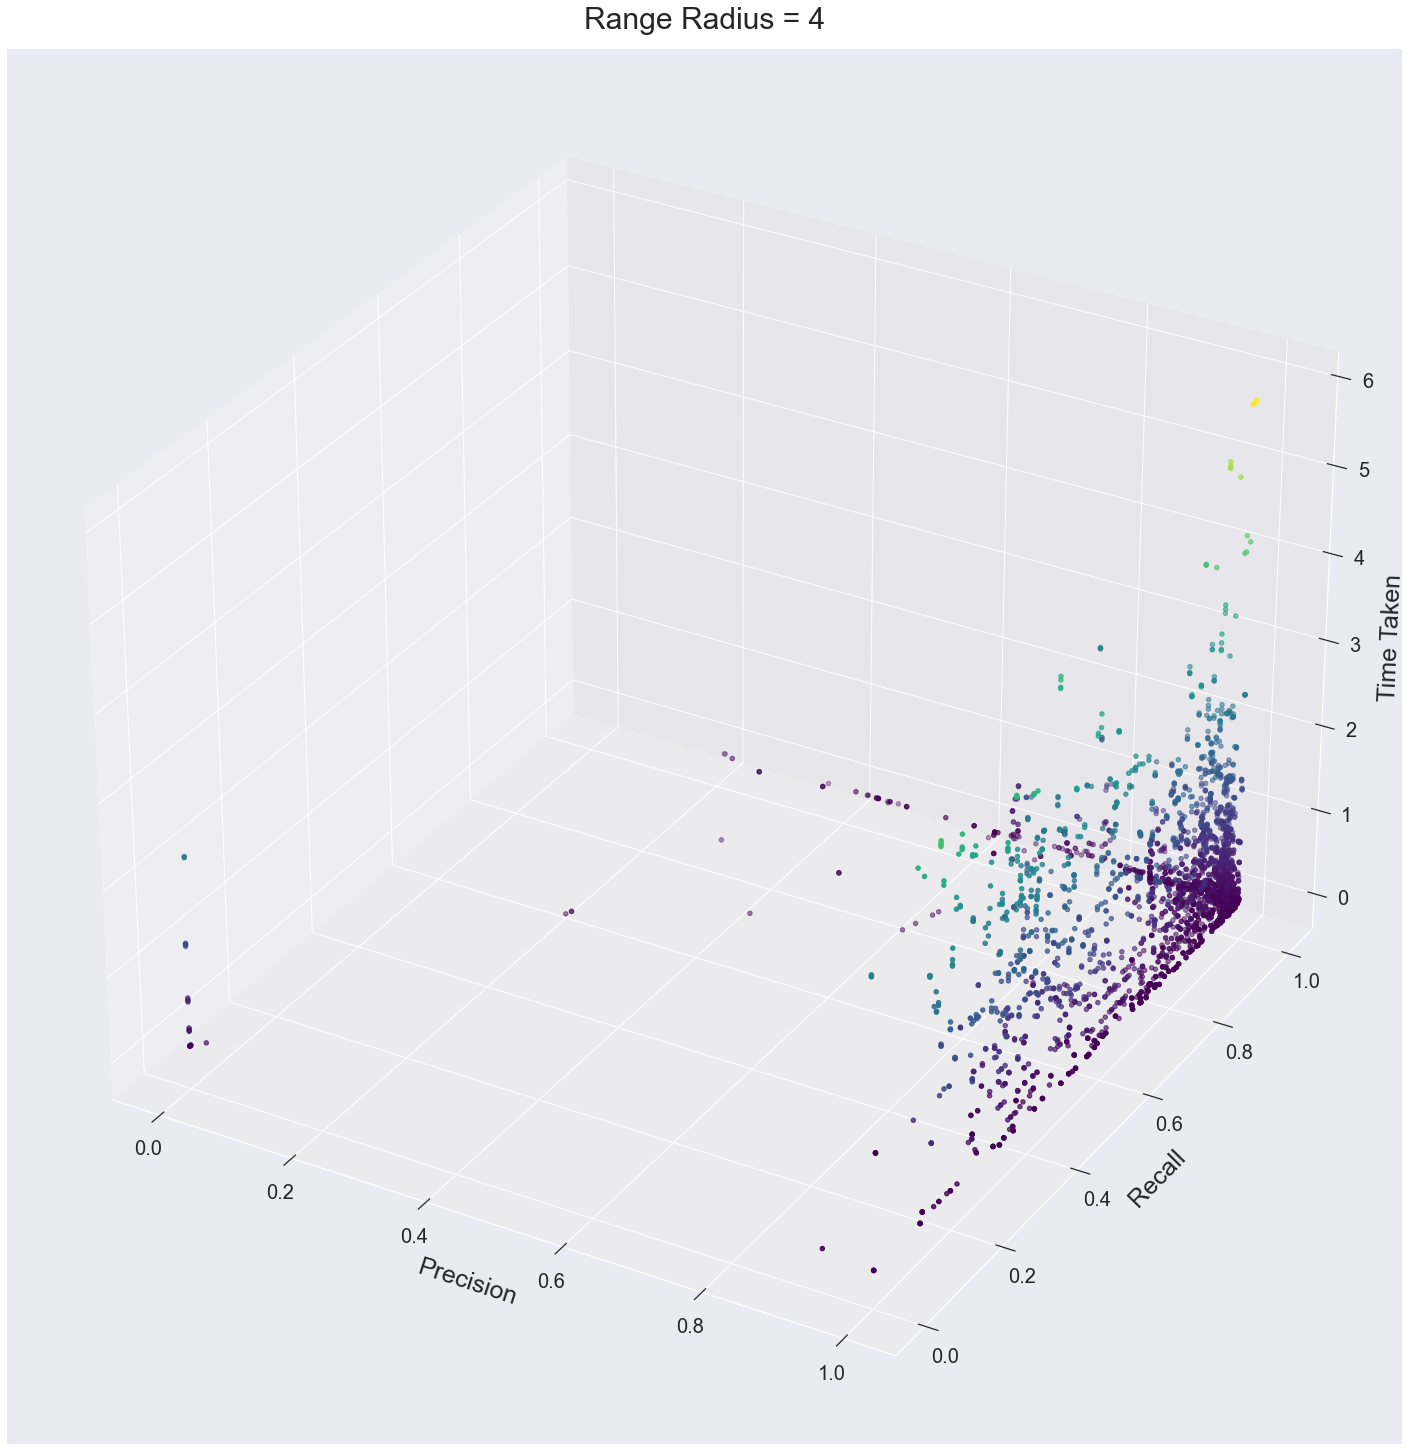

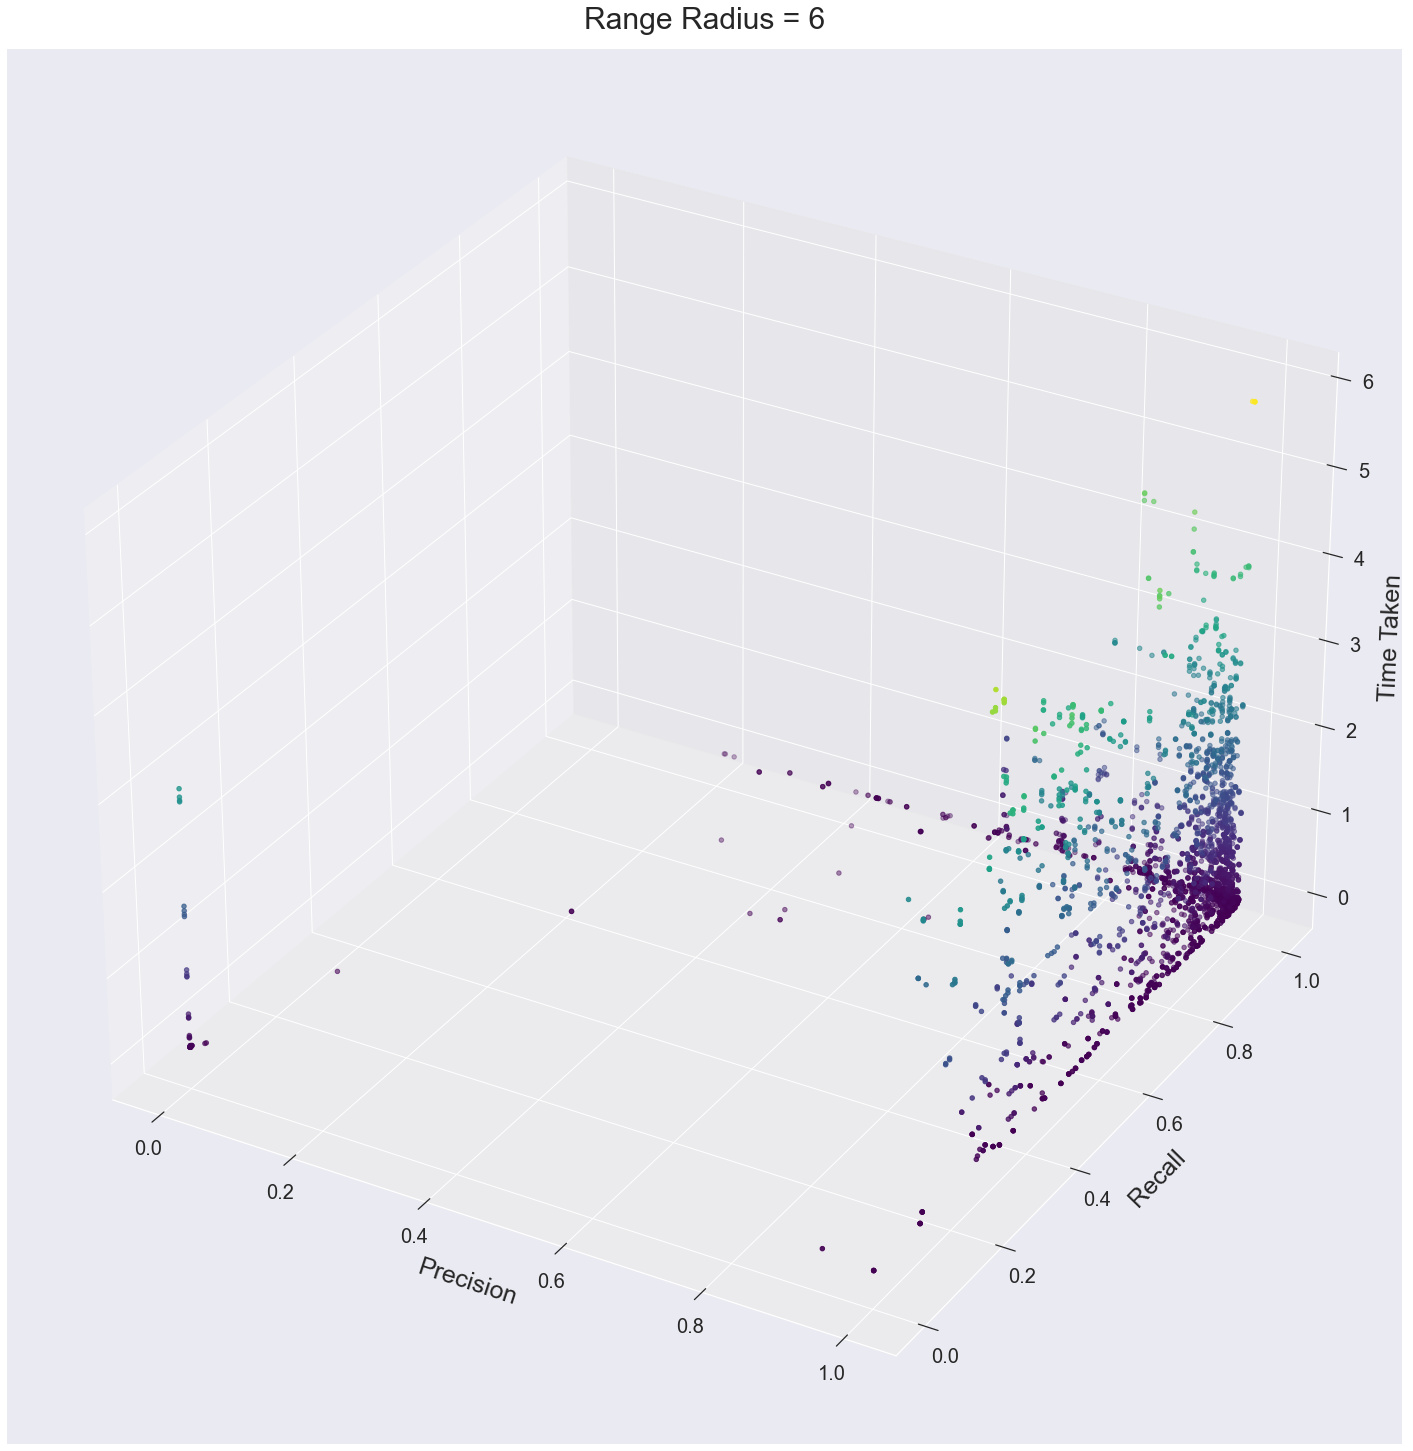

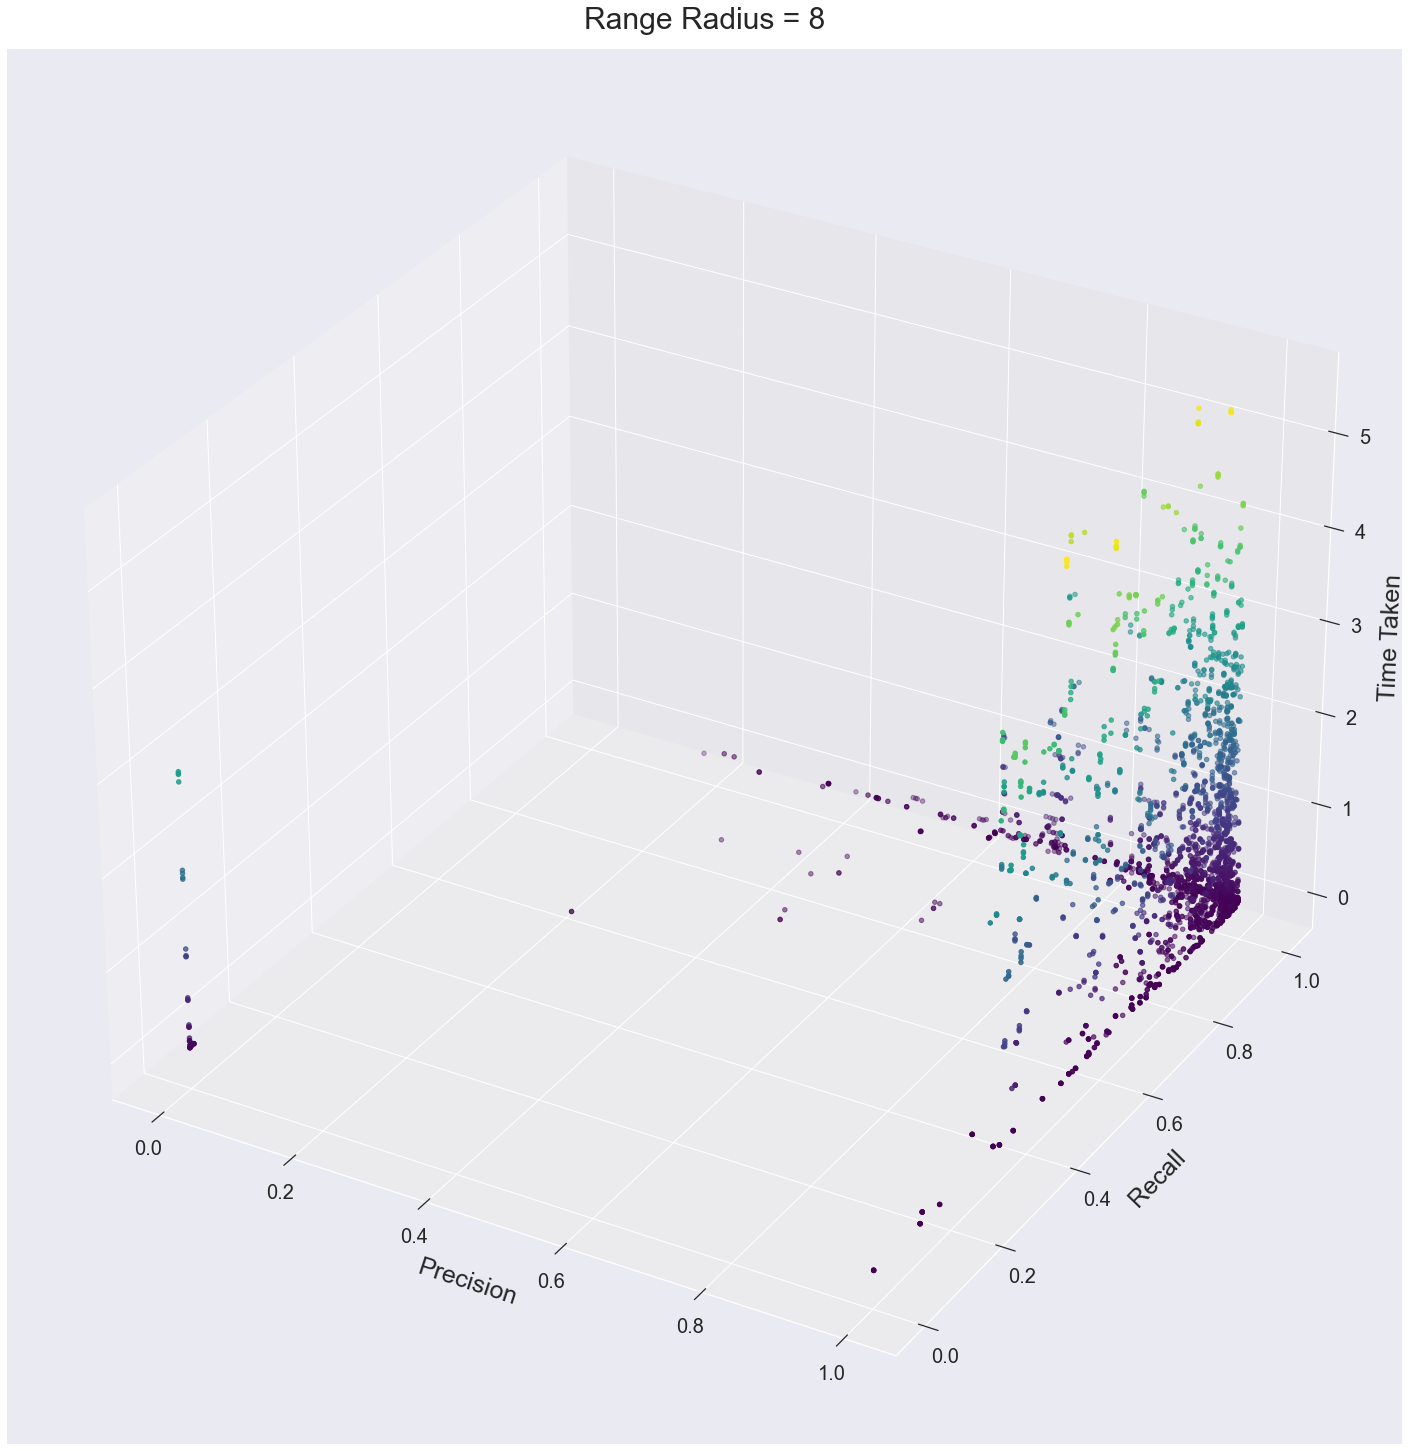

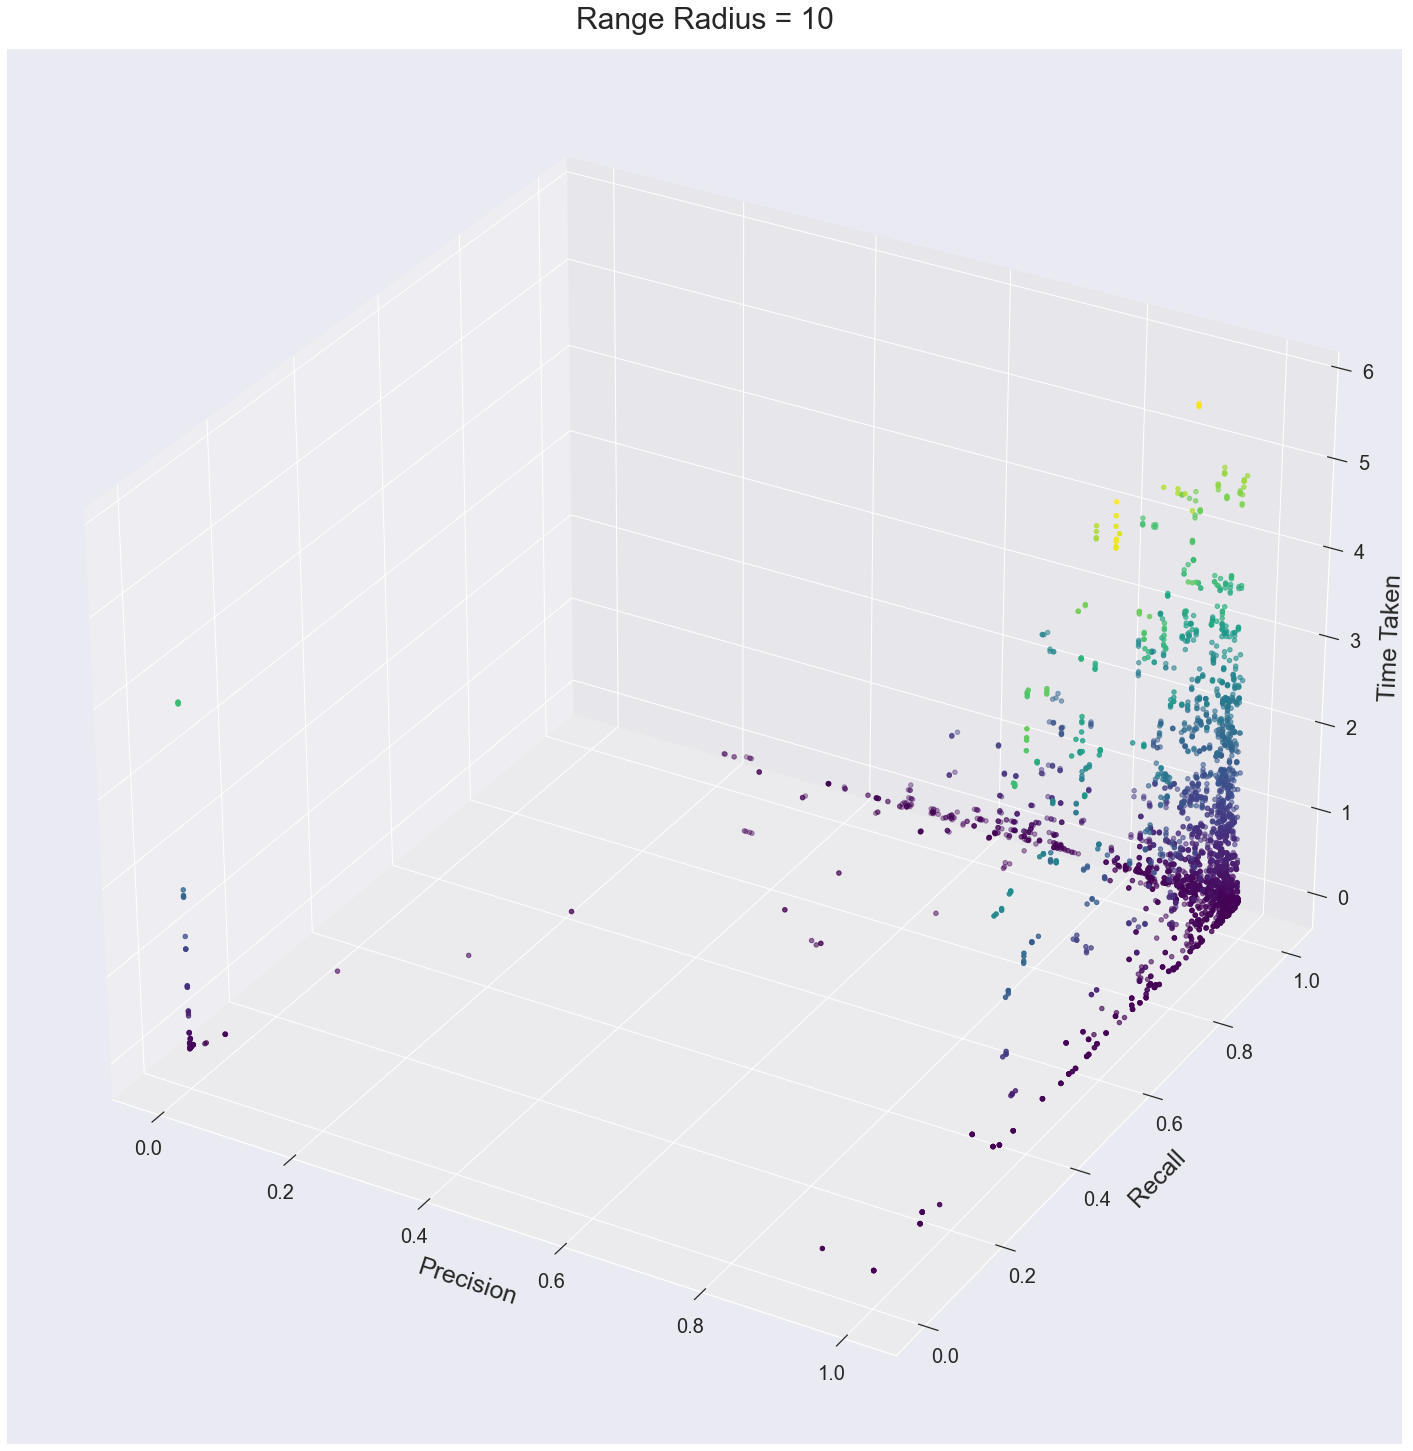

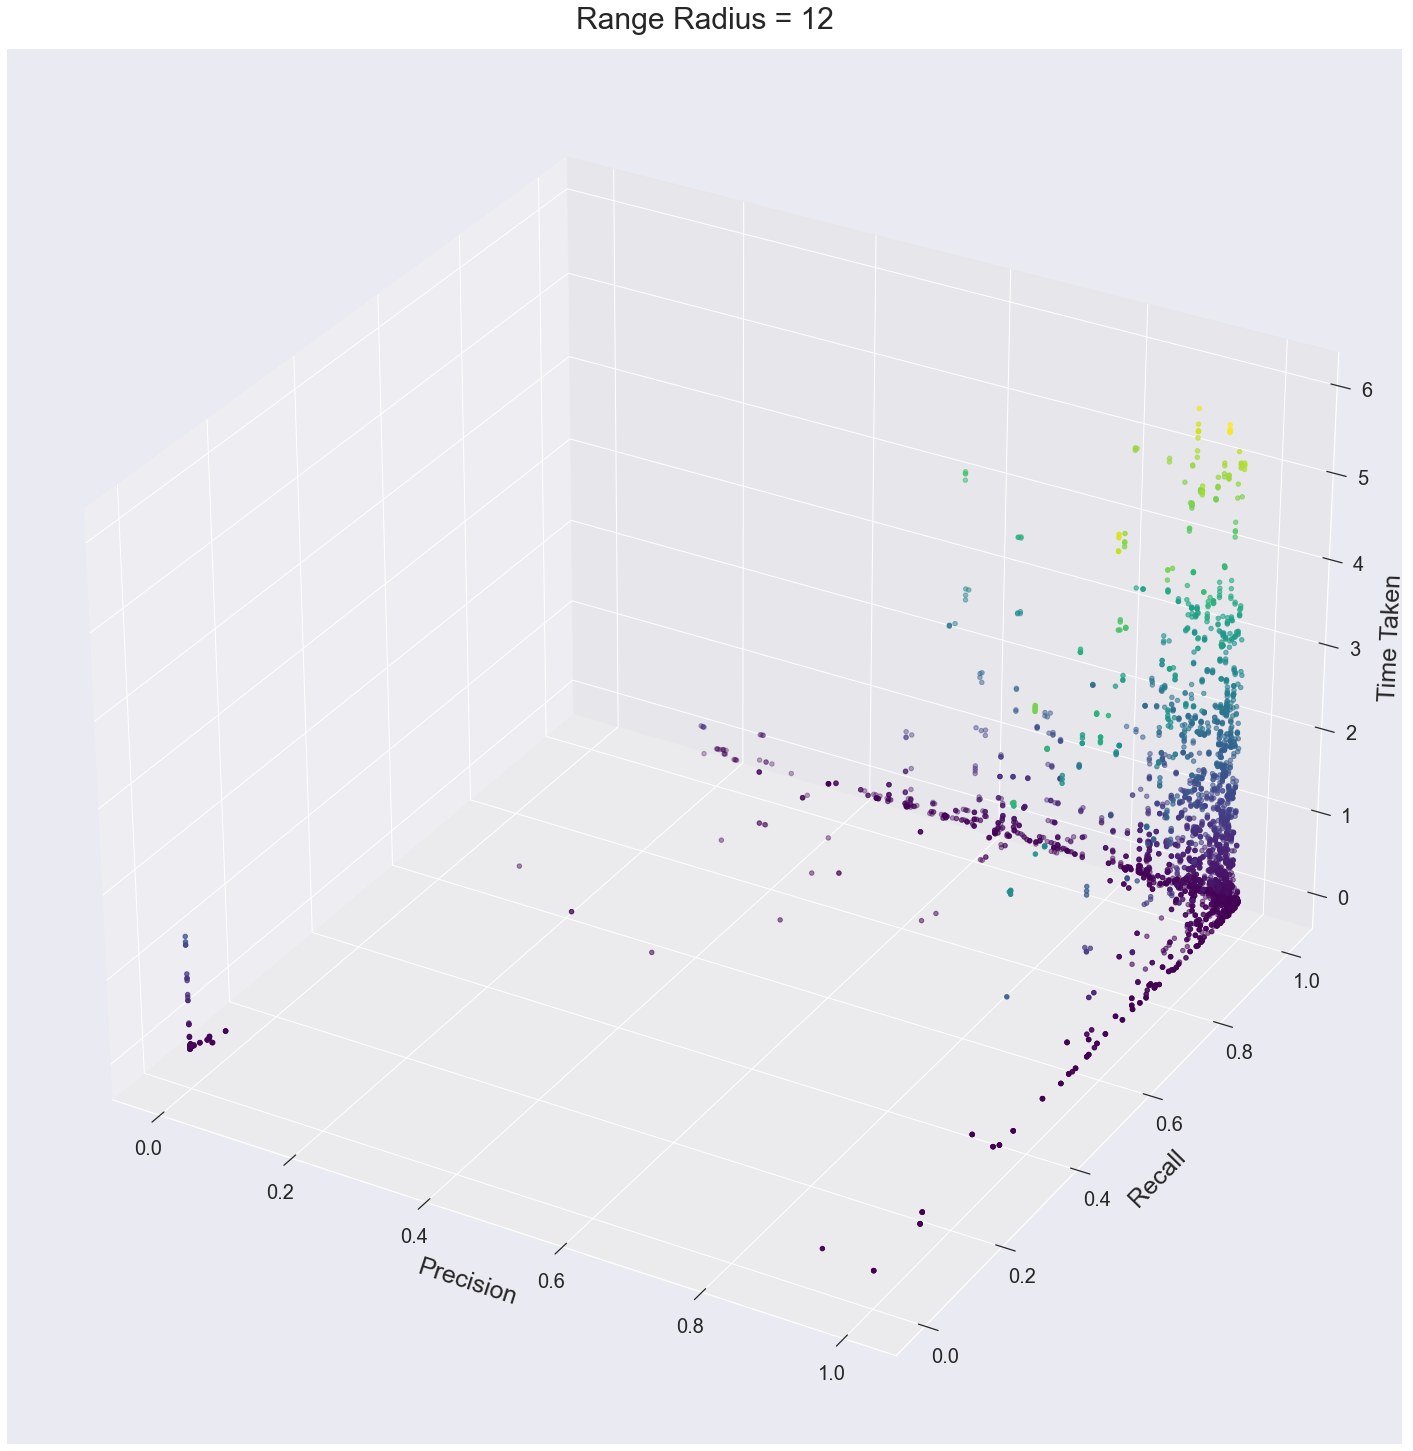

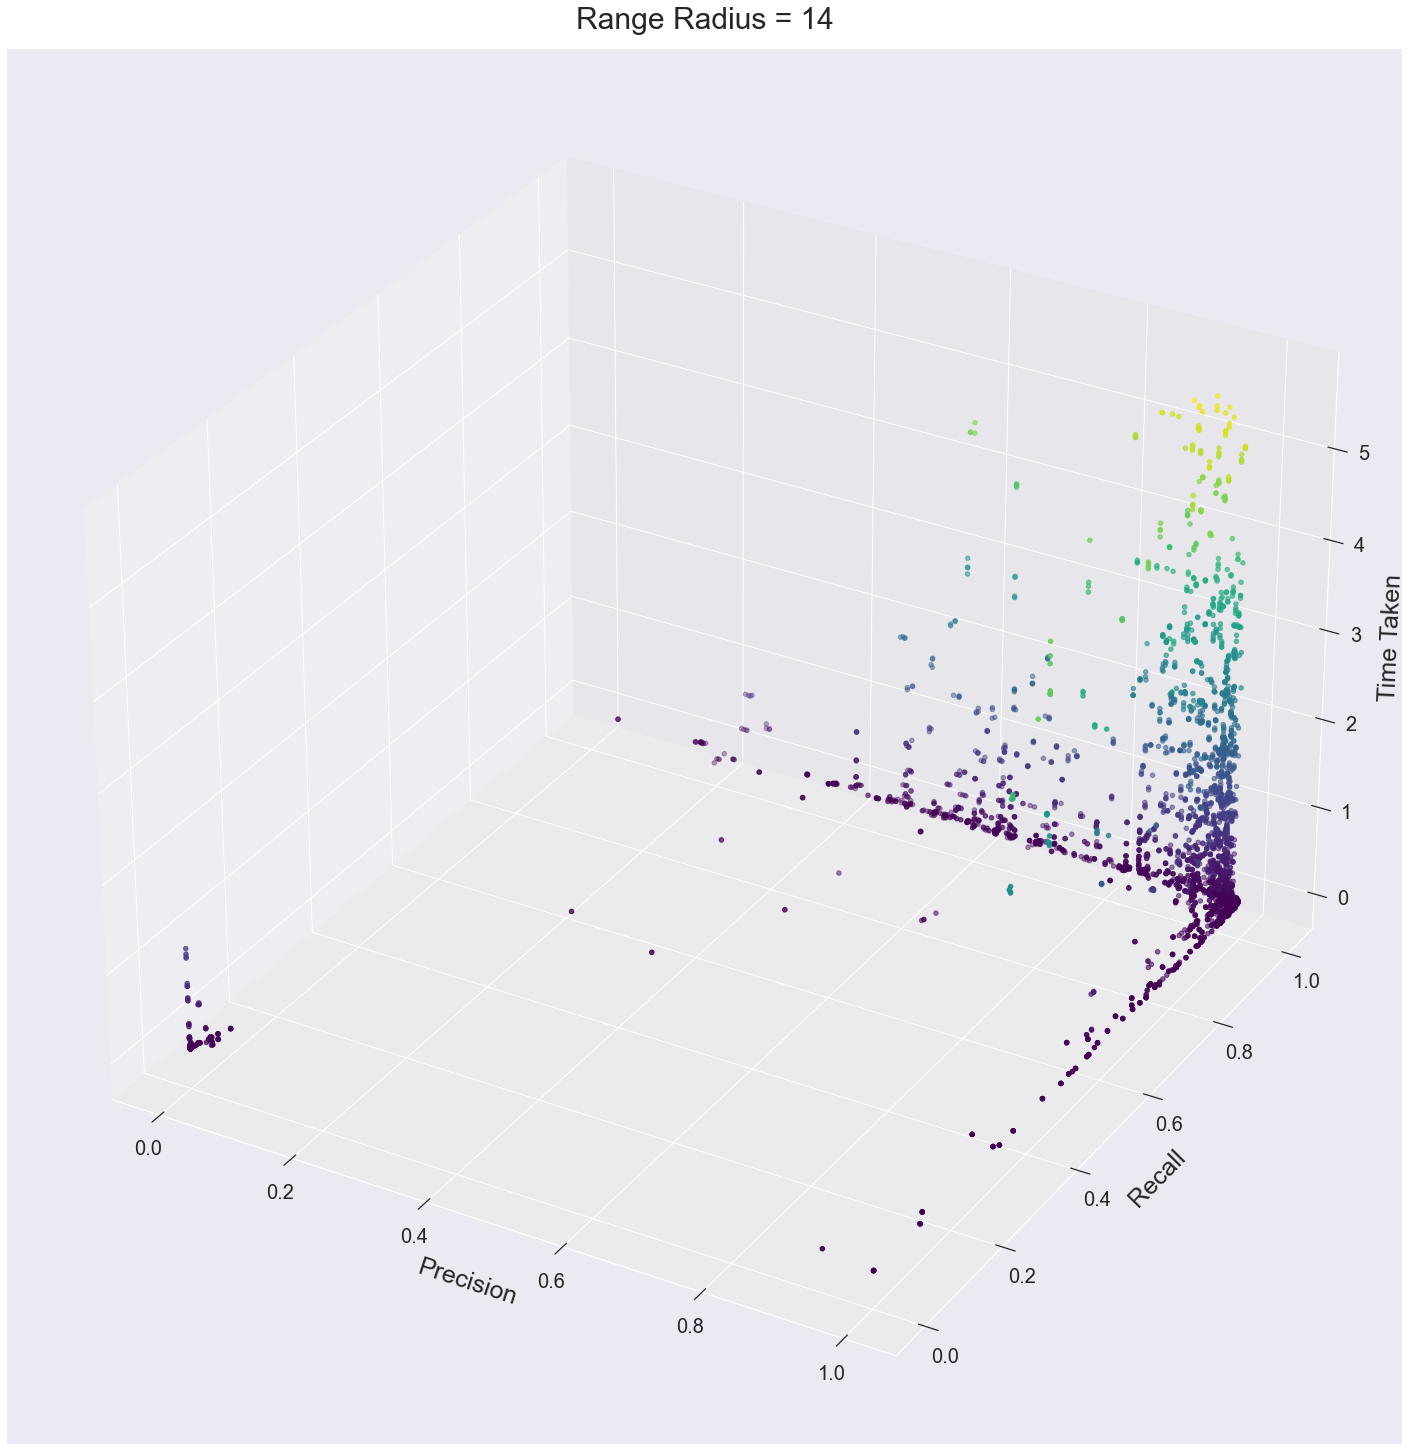

In [23]:
#make a 3d plot of the result for precision, recall and time taken for each range_radius
for i in rr_array:
    fig = plt.figure(figsize=(25, 30))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(results['precision'][results['range_radius'] == i], results['recall'][results['range_radius'] == i], results['time_taken'][results['range_radius'] == i], c=results['time_taken'][results['range_radius'] == i], cmap='viridis')
    ax.set_xlabel('Precision', fontsize=25, labelpad=20)
    ax.set_ylabel('Recall', fontsize=25, labelpad=20)
    ax.set_zlabel('Time Taken', fontsize=25, labelpad=20)
    ax.set_title('Range Radius = ' + str(i), fontsize=30, pad=20)
    ax.tick_params(axis='x', labelsize=20, pad=10)
    ax.tick_params(axis='y', labelsize=20, pad=10)
    ax.tick_params(axis='z', labelsize=20, pad=10)
    plt.show()

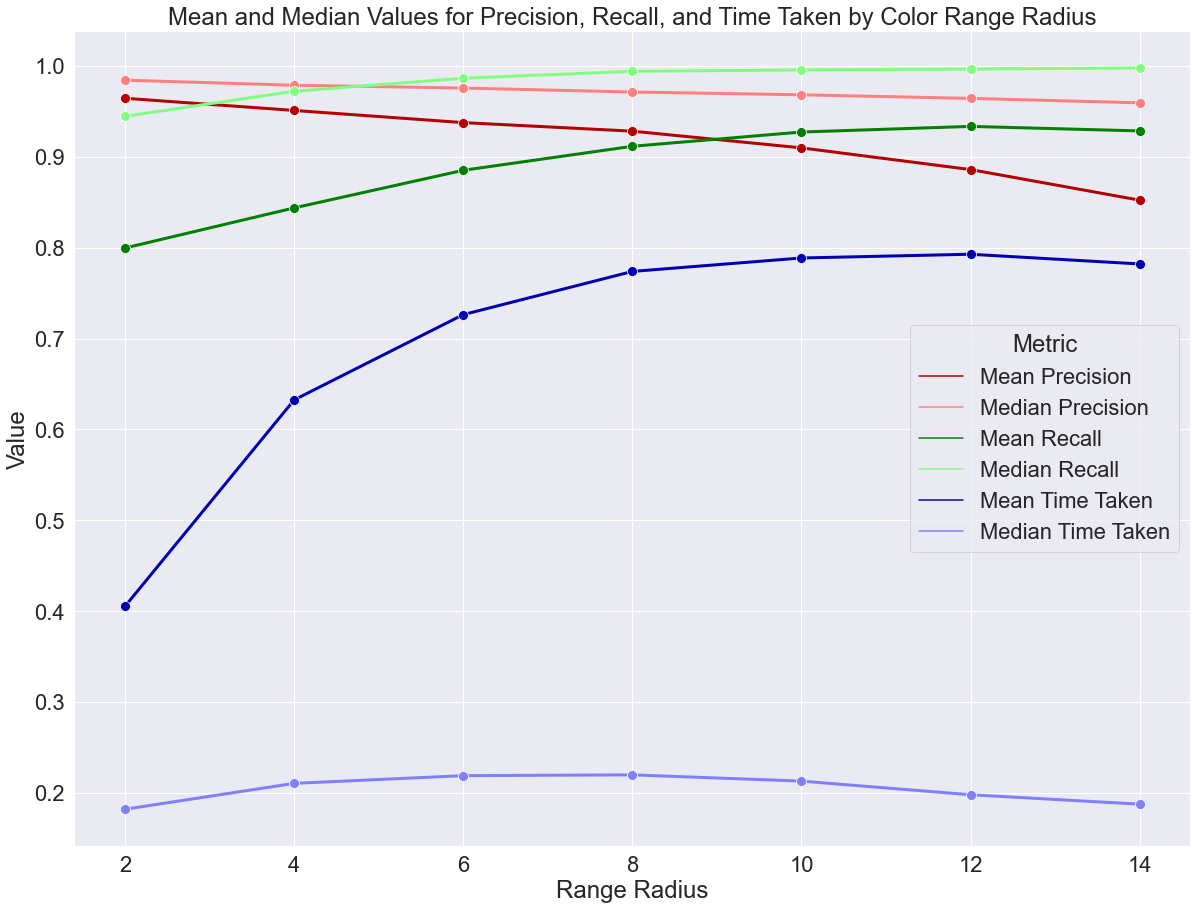

In [24]:
# Group the dataframe by spatial radius
grouped = df.groupby('range_radius')

# Calculate the mean and median values for precision, recall, and time_taken for each group
mean_precision = grouped['precision'].mean()
median_precision = grouped['precision'].median()
mean_recall = grouped['recall'].mean()
median_recall = grouped['recall'].median()
mean_time_taken = grouped['time_taken'].mean()
median_time_taken = grouped['time_taken'].median()

# Create a dataframe with the mean and median values for each group
data = pd.DataFrame({
    'Range Radius': mean_precision.index,
    'Mean Precision': mean_precision.values,
    'Median Precision': median_precision.values,
    'Mean Recall': mean_recall.values,
    'Median Recall': median_recall.values,
    'Mean Time Taken': mean_time_taken.values,
    'Median Time Taken': median_time_taken.values
})

# Melt the dataframe to create a long-form dataset
melted_data = pd.melt(data, id_vars=['Range Radius'], var_name='Metric', value_name='Value')

# Create a line plot with mean and median values for precision, recall, and time_taken for each group
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
sns.set_palette([
    (0.7, 0, 0), (1, 0.5, 0.5), # Dark red and light red for mean precision and median precision
    (0, 0.5, 0), (0.5, 1, 0.5), # Dark green and light green for mean recall and median recall
    (0, 0, 0.7), (0.5, 0.5, 1)  # Dark blue and light blue for mean time taken and median time taken
])
sns.lineplot(x='Range Radius', y='Value', hue='Metric', data=melted_data, linewidth=3, marker='o', markersize=10)
plt.xlabel('Range Radius')
plt.ylabel('Value')
plt.title('Mean and Median Values for Precision, Recall, and Time Taken by Color Range Radius')
plt.show()

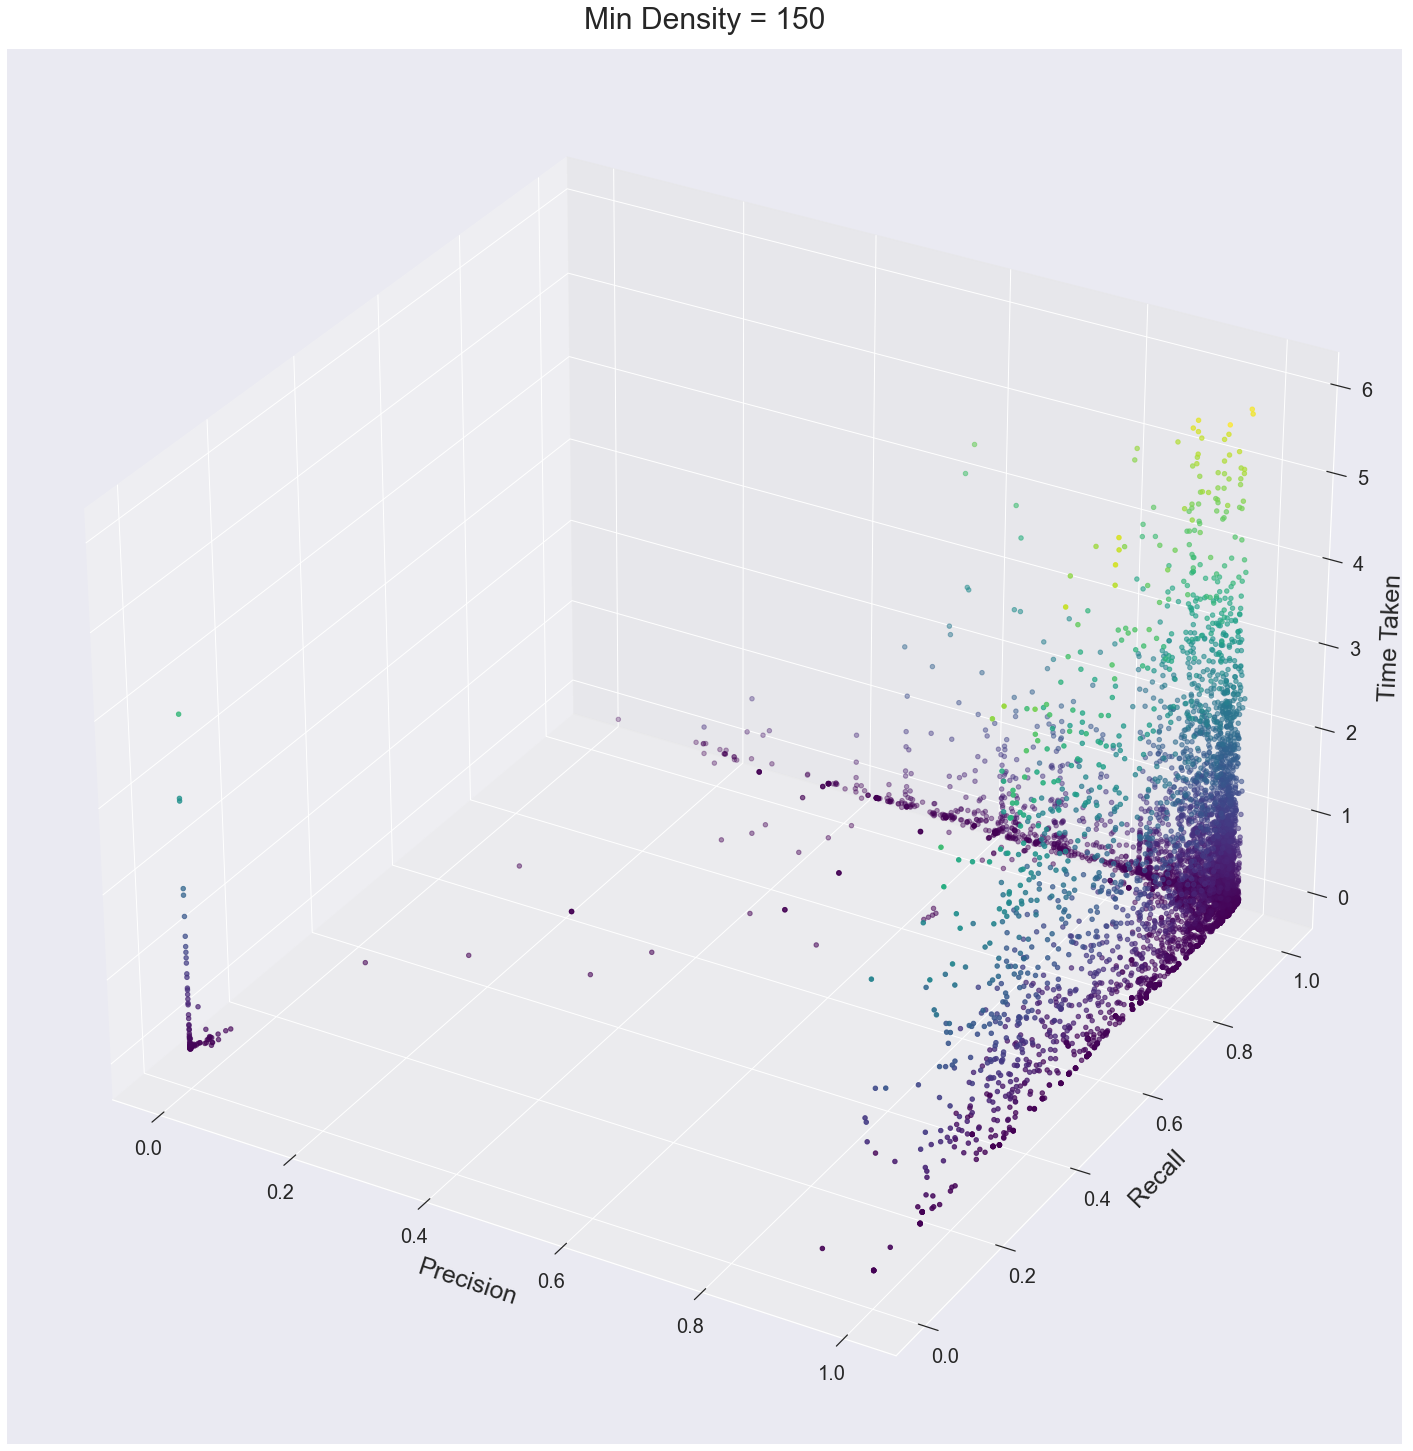

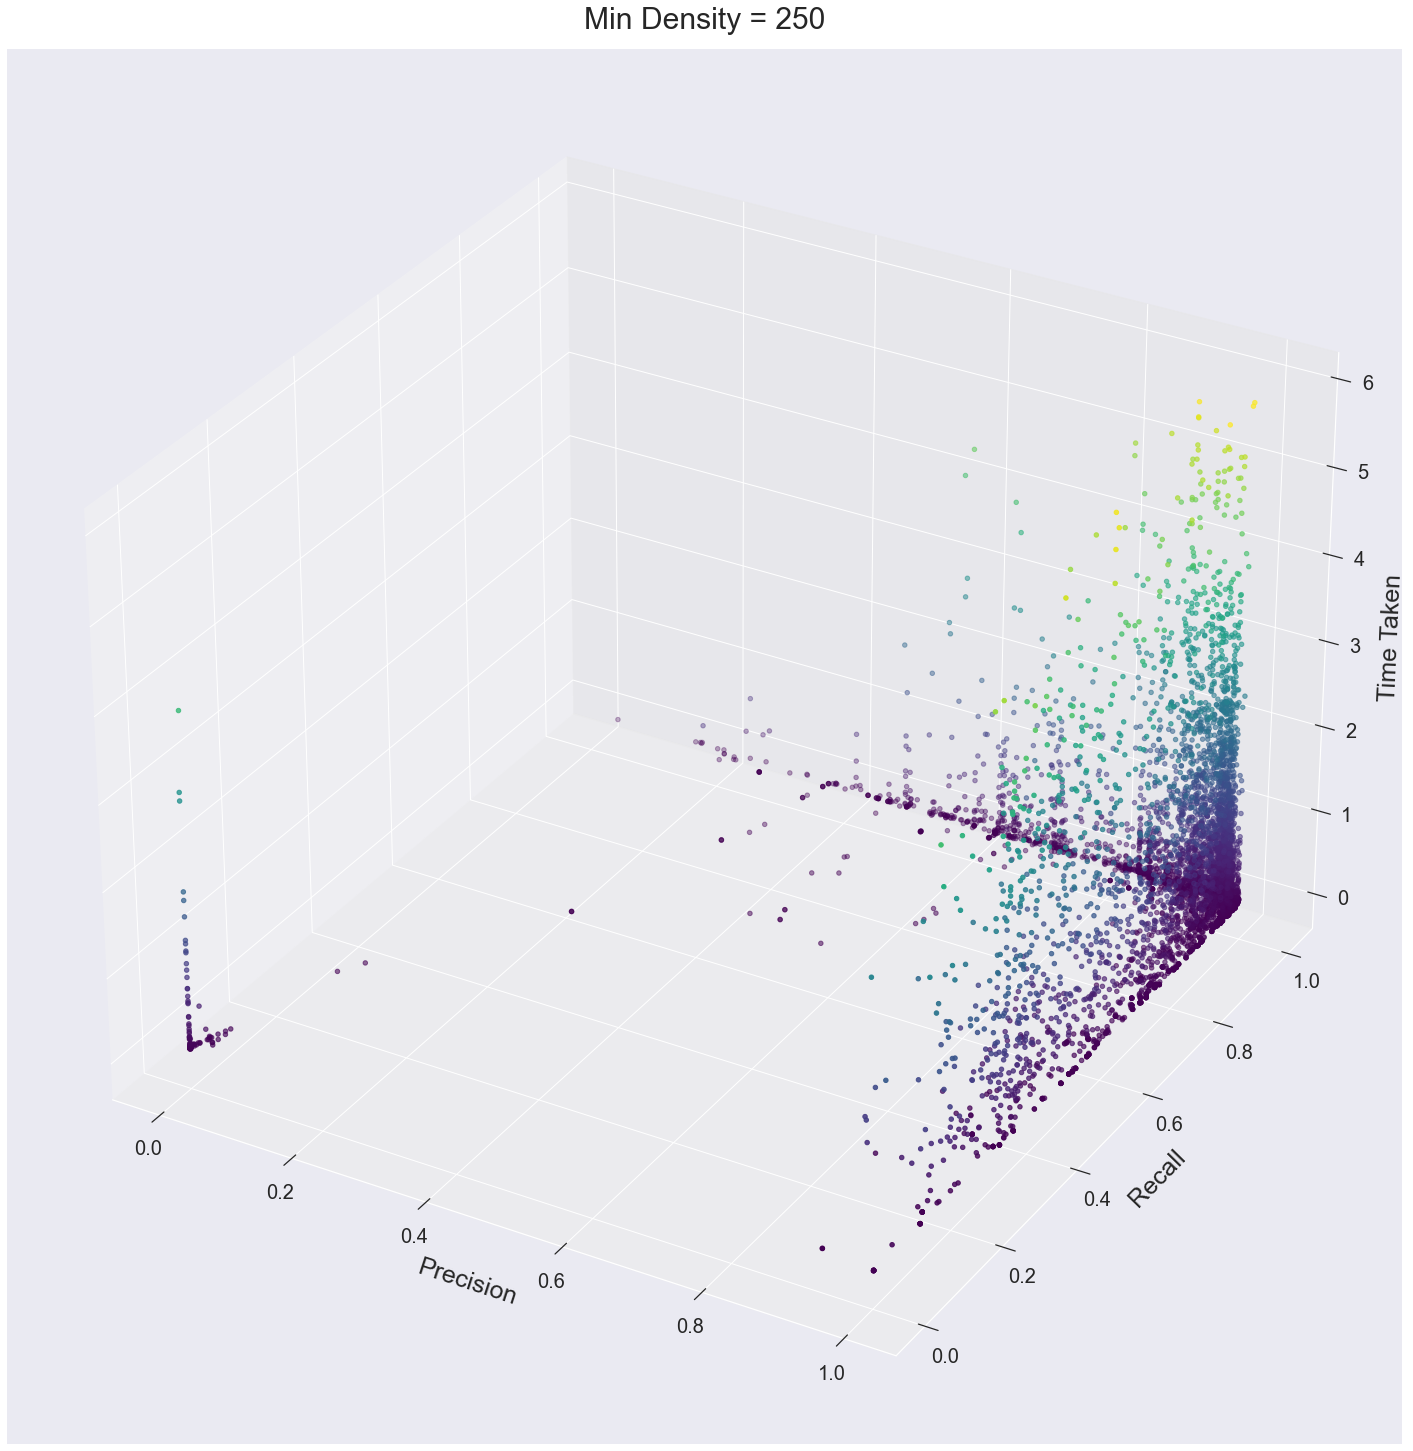

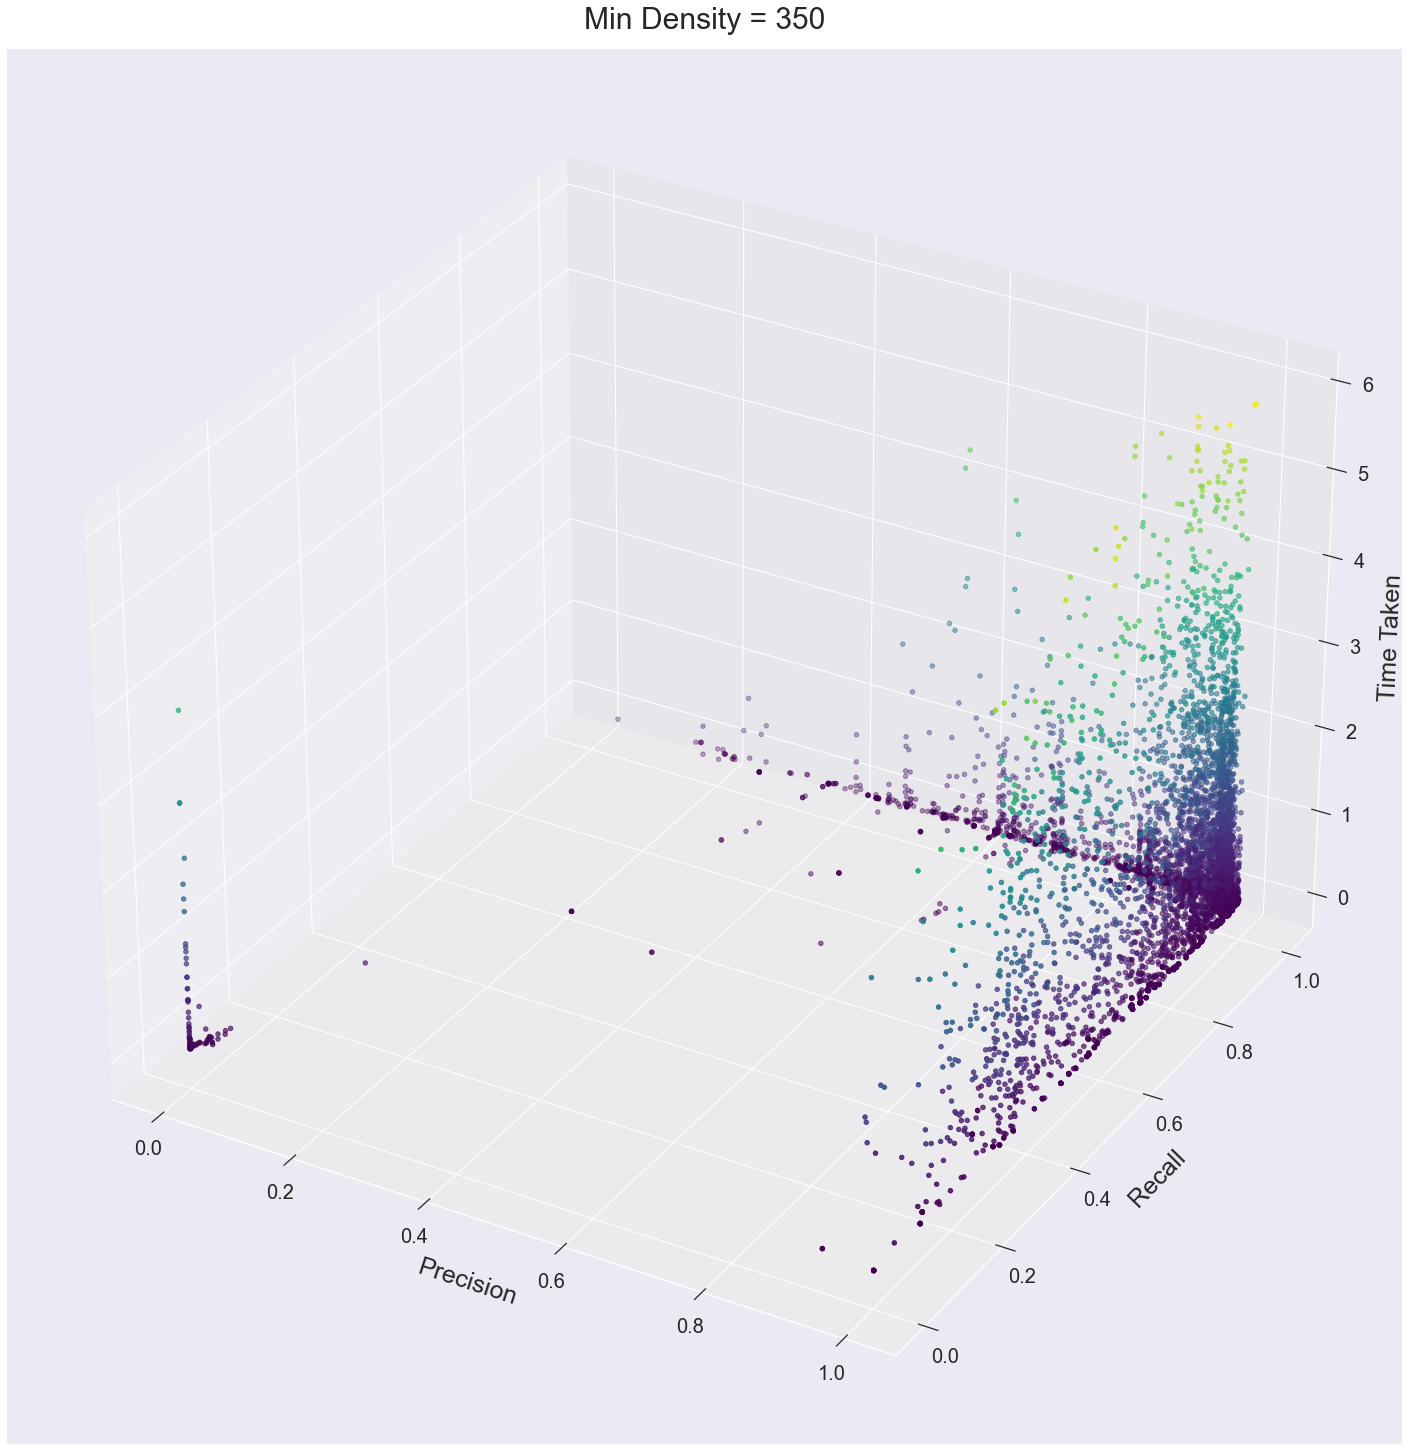

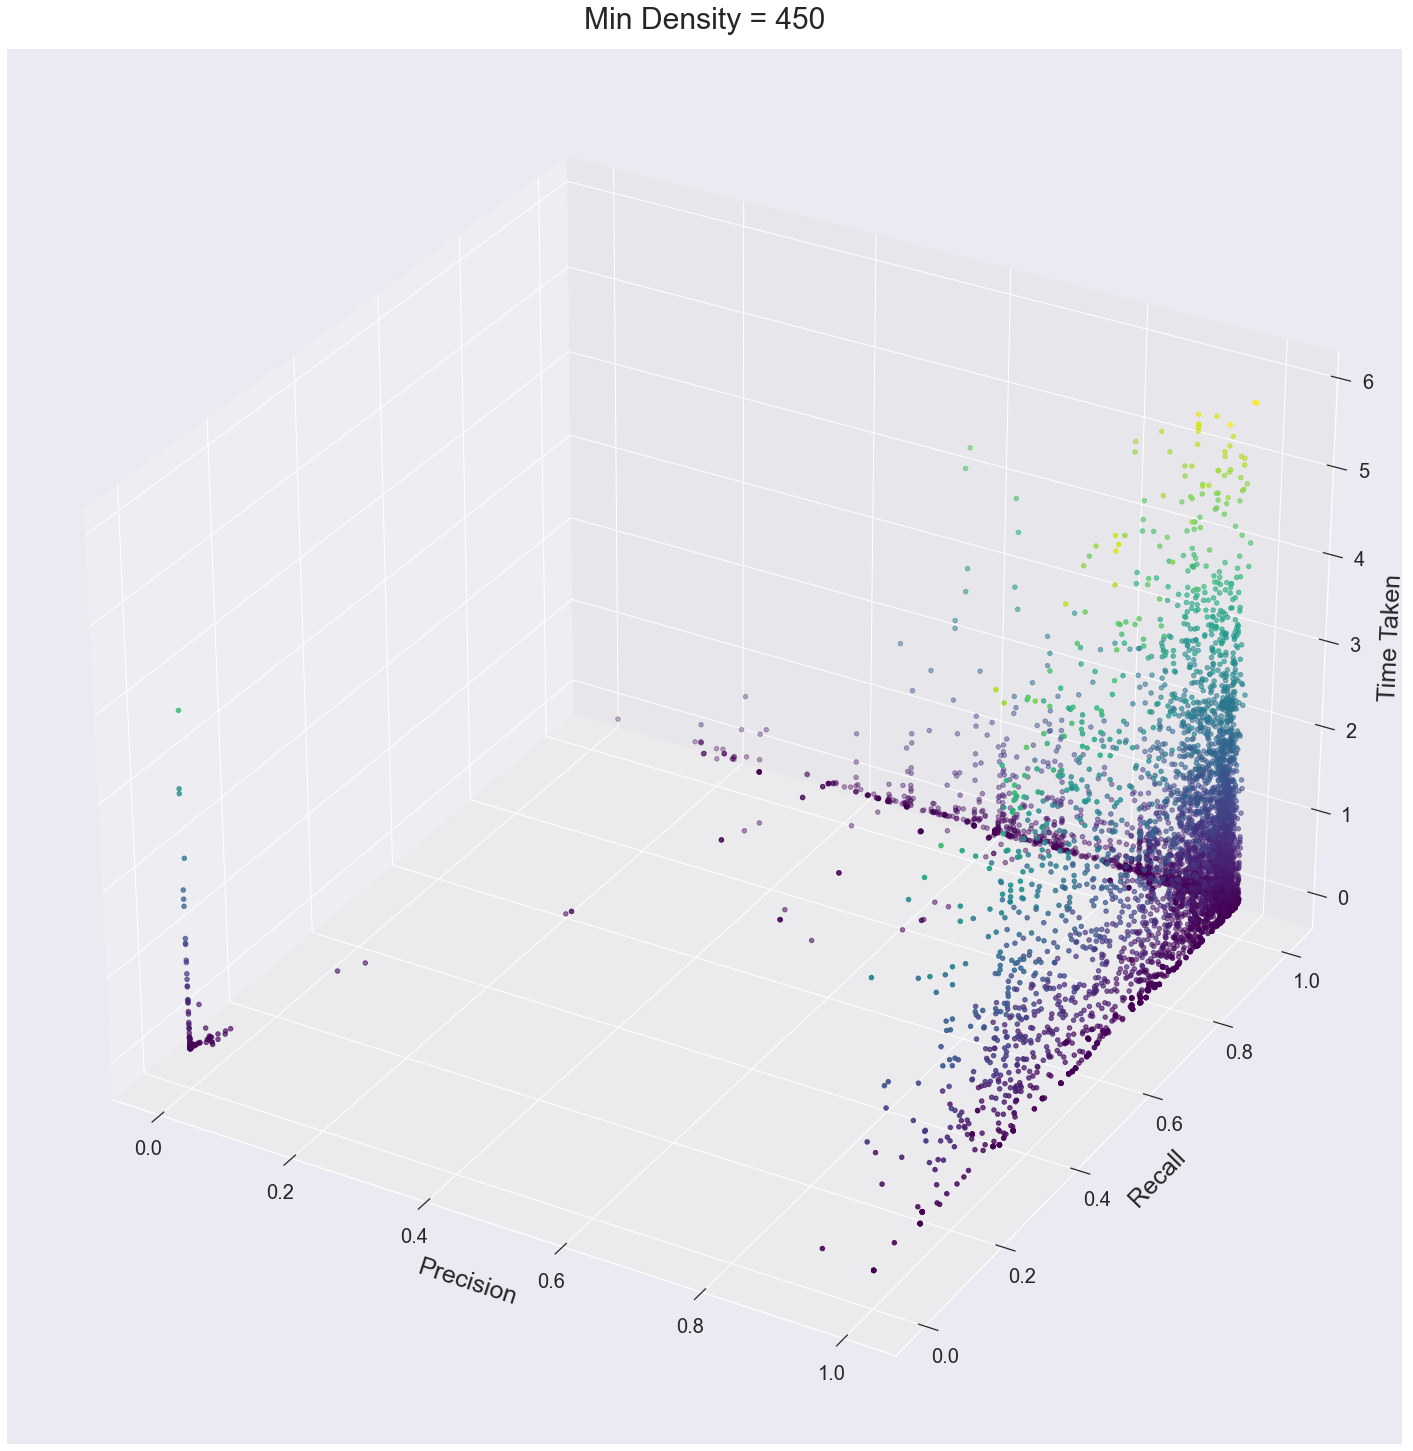

In [25]:
#make a 3d plot of the result for precision, recall and time taken for each min_density
for i in min_array:
    fig = plt.figure(figsize=(25, 30))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(results['precision'][results['min_density'] == i], results['recall'][results['min_density'] == i], results['time_taken'][results['min_density'] == i], c=results['time_taken'][results['min_density'] == i], cmap='viridis')
    ax.set_xlabel('Precision', fontsize=25, labelpad=20)
    ax.set_ylabel('Recall', fontsize=25, labelpad=20)
    ax.set_zlabel('Time Taken', fontsize=25, labelpad=20)
    ax.set_title('Min Density = ' + str(i), fontsize=30, pad=20)
    ax.tick_params(axis='x', labelsize=20, pad=10)
    ax.tick_params(axis='y', labelsize=20, pad=10)
    ax.tick_params(axis='z', labelsize=20, pad=10)
    plt.show()

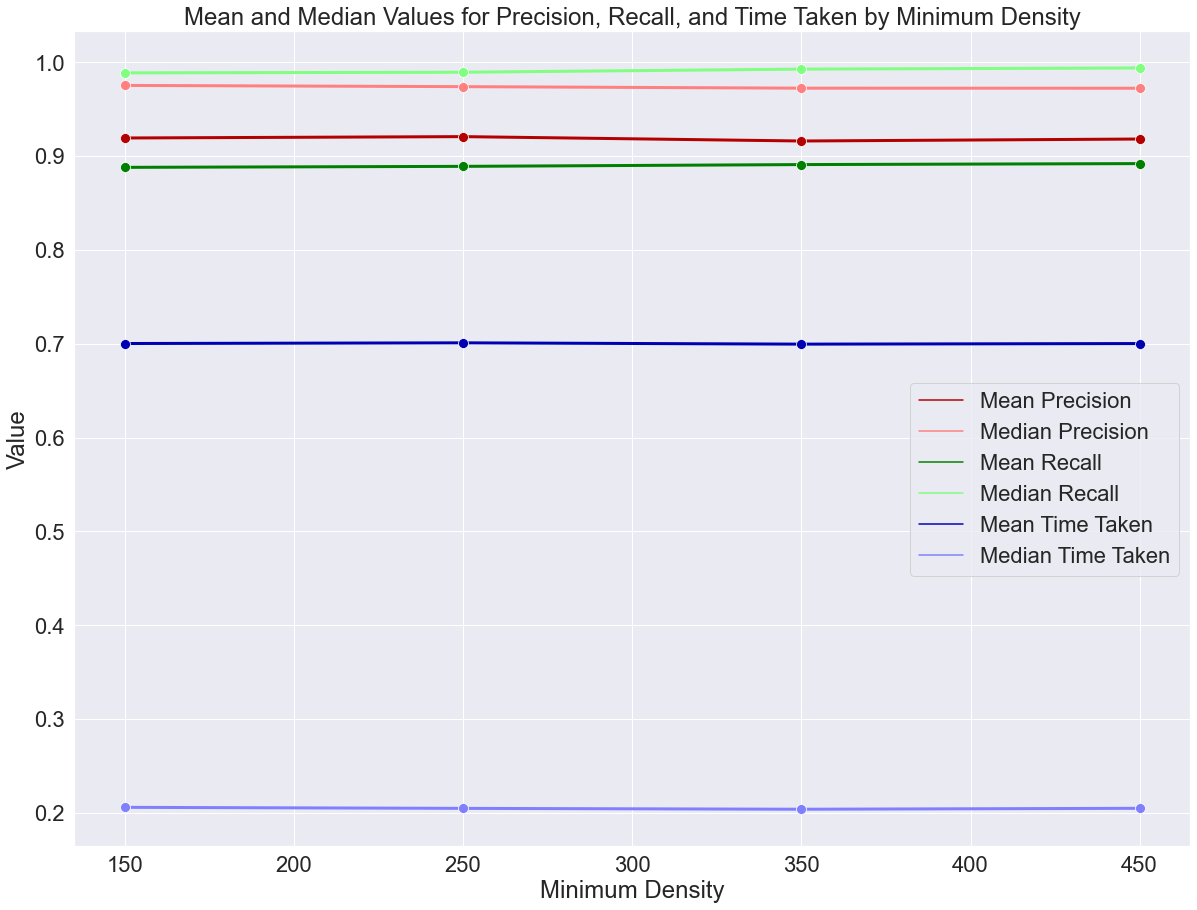

In [26]:
# Group the dataframe by spatial radius
grouped = df.groupby('min_density')

# Calculate the mean and median values for precision, recall, and time_taken for each group
mean_precision = grouped['precision'].mean()
median_precision = grouped['precision'].median()
mean_recall = grouped['recall'].mean()
median_recall = grouped['recall'].median()
mean_time_taken = grouped['time_taken'].mean()
median_time_taken = grouped['time_taken'].median()

# Create a dataframe with the mean and median values for each group
data = pd.DataFrame({
    'Minimum Density': mean_precision.index,
    'Mean Precision': mean_precision.values,
    'Median Precision': median_precision.values,
    'Mean Recall': mean_recall.values,
    'Median Recall': median_recall.values,
    'Mean Time Taken': mean_time_taken.values,
    'Median Time Taken': median_time_taken.values
})

# Melt the dataframe to create a long-form dataset
melted_data = pd.melt(data, id_vars=['Minimum Density'], var_name='Metric', value_name='Value')

# Create a line plot with mean and median values for precision, recall, and time_taken for each group
sns.set(rc={'figure.figsize':(20,15)})
sns.set(font_scale=2)
sns.set_palette([
    (0.7, 0, 0), (1, 0.5, 0.5), # Dark red and light red for mean precision and median precision
    (0, 0.5, 0), (0.5, 1, 0.5), # Dark green and light green for mean recall and median recall
    (0, 0, 0.7), (0.5, 0.5, 1)  # Dark blue and light blue for mean time taken and median time taken
])
sns.lineplot(x='Minimum Density', y='Value', hue='Metric', data=melted_data, linewidth=3, marker='o', markersize=10)
plt.xlabel('Minimum Density')
plt.ylabel('Value')
plt.title('Mean and Median Values for Precision, Recall, and Time Taken by Minimum Density')
plt.legend(loc='center right', bbox_to_anchor=(1.00, 0.45), ncol=1)
plt.show()

### Score Function

The score function is used to combine the precision, recall and time together into a single value, in order to compare them

In [27]:
#define a function that takes precision, recall and time taken and return a non-linear combined weighted score
def score(precision, recall, time_taken):
    return (precision * recall) #/ (time_taken + 0.1)  #add something super small

#add a column to the results dataframe with the score
results['score'] = [score(precision, recall, time_taken) for precision, recall, time_taken in zip(results['precision'], results['recall'], results['time_taken'])]

#### Display Score Function graph

No handles with labels found to put in legend.


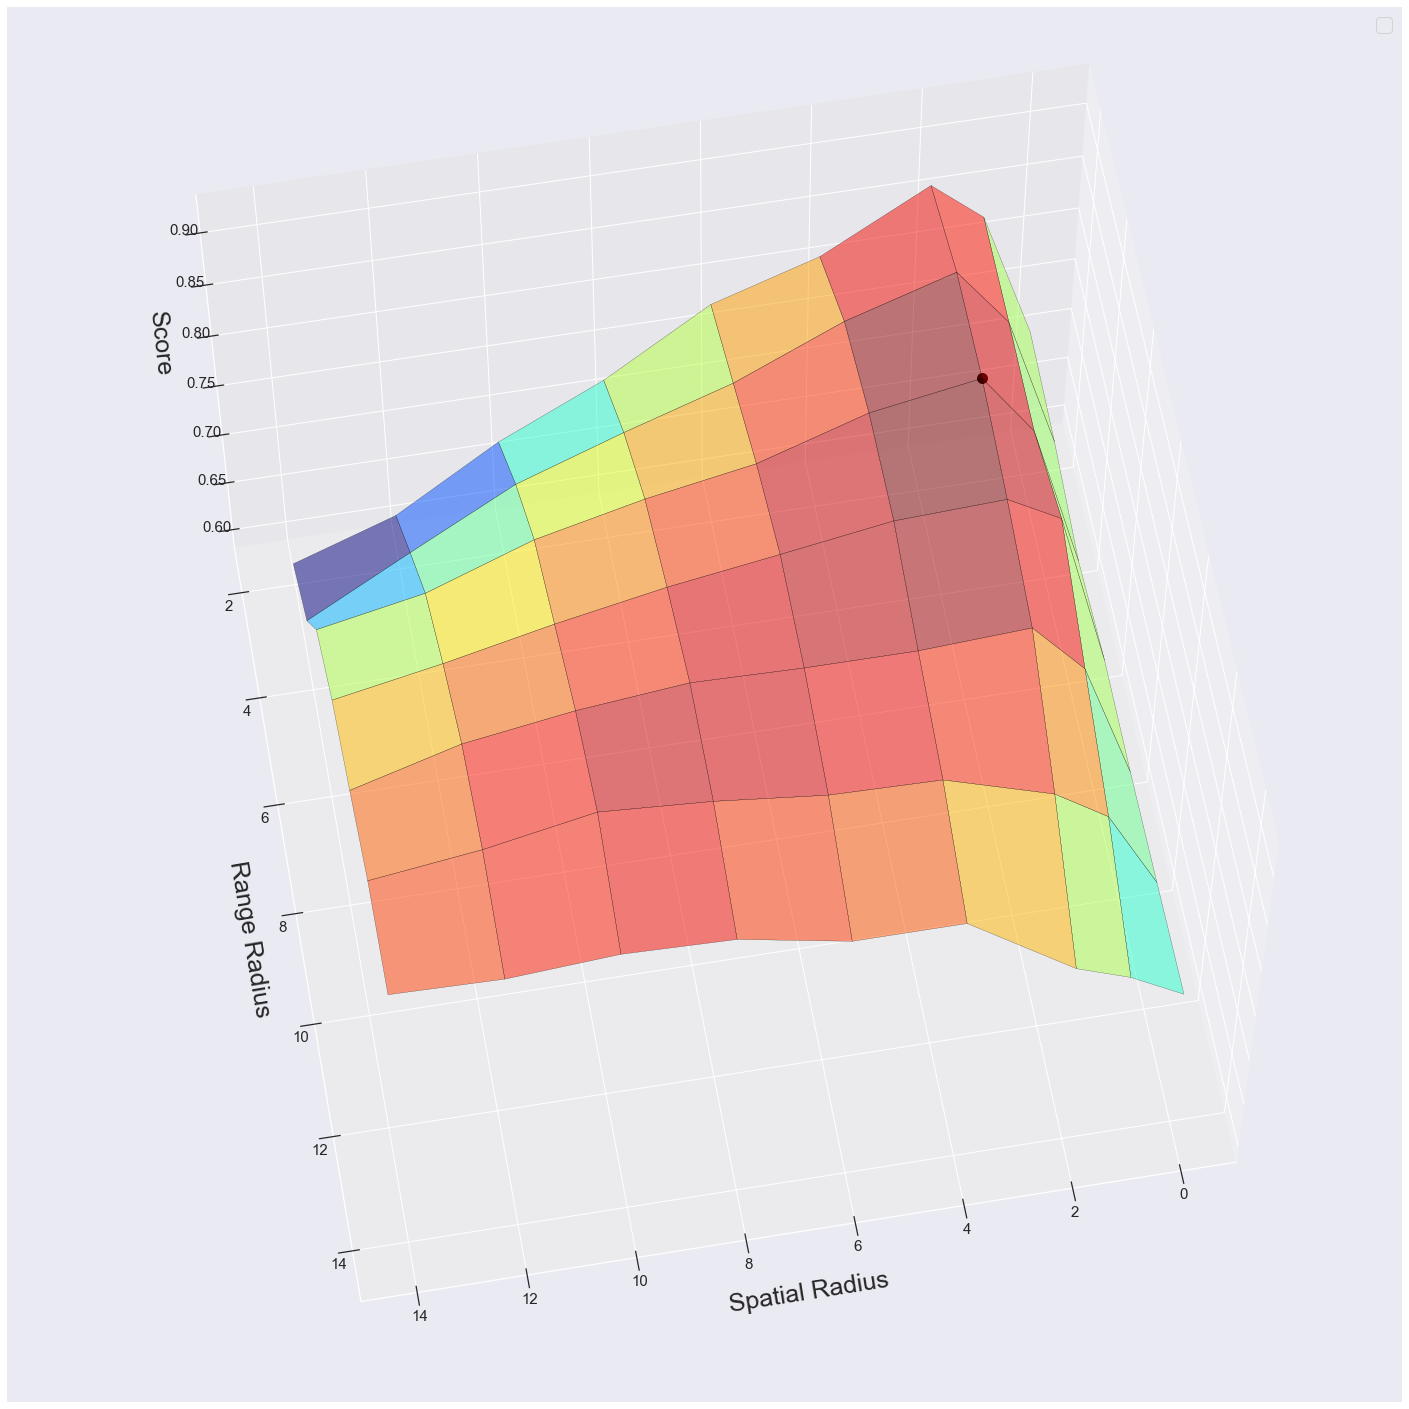

In [28]:
#get the average score for each spatial_radius, range_radius, and min_density and plot these values
score_array = []
for i in sr_array:
    for j in rr_array:
        for k in min_array:
            score_array.append([i, j, k, np.mean([l[8] for l in [m for m in [n for n in results.values if n[5] == i] if m[6] == j] if l[7] == k])])

#for each spatial_radius and range_radius, take the mean score value
score_array = [[i[0], i[1], np.mean([j[3] for j in [k for k in score_array if k[0] == i[0]] if j[1] == i[1]])] for i in score_array]

from matplotlib import cm

cmap = cm.get_cmap('jet')
#get the max and min score
max_score = max([k[2] for k in score_array])
min_score = min([k[2] for k in score_array])
rgba = [cmap((k[2]-min_score)/(max_score-min_score)) for k in score_array] 

#generate a 3D meshgrid of the spatial_radius, range_radius, and score values
x, y = np.meshgrid(sr_array, rr_array)
z = griddata((np.array([i[0] for i in score_array]), np.array([i[1] for i in score_array])), np.array([i[2] for i in score_array]), (x, y), method='cubic')

#plot a 3D surface plot of the score for each x axis as spatial_radius, y axis as range_radius, and z axis as score
fig = plt.figure(figsize=(25, 30))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60, azim=80)
ax.plot_surface(x, y, z, cmap='jet', edgecolor='black', alpha=0.5, linewidth=0.2, antialiased=True, rstride=1, cstride=1)
ax.set_xlabel('Spatial Radius', fontsize=25, labelpad=20)
ax.set_ylabel('Range Radius', fontsize=25, labelpad=20)
ax.set_zlabel('Score', fontsize=25, labelpad=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(fontsize=20)

#find the highest point and plot it as a dark red dot
highest_point = max(score_array, key=lambda x: x[2])
ax.scatter(highest_point[0], highest_point[1], highest_point[2], color='black', s=100, alpha=1.0)

plt.show()

#### Worst Performing Case

------------------------------------------------------------------------------------------------------------------------
Processing: 7233, spatial_radius: 2, range_radius: 12, min_density: 450
Time taken:  0.05704998970031738


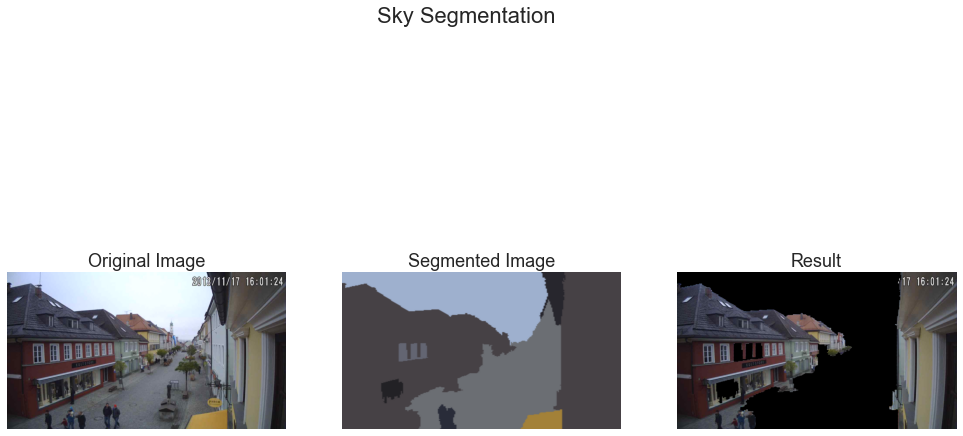

Precision: 5.966587112171838e-06
Recall: 1.9582373253089118e-05
F1: 9.146355406029583e-06
------------------------------------------------------------------------------------------------------------------------


In [29]:
#show the results for the lowest score values
for i in results.sort_values(by=['score'], ascending=True).head(1).values:
    display_results(DATASET_FOLDER + "original\\"+ i[3], baseline_mean_shift, print_mode = 'display' ,dataset_mode='validate', spatial_radius=i[5], range_radius=i[6], min_density=i[7])

#### Best Performing Case

------------------------------------------------------------------------------------------------------------------------
Processing: 260, spatial_radius: 2, range_radius: 6, min_density: 450
Time taken:  0.06351709365844727


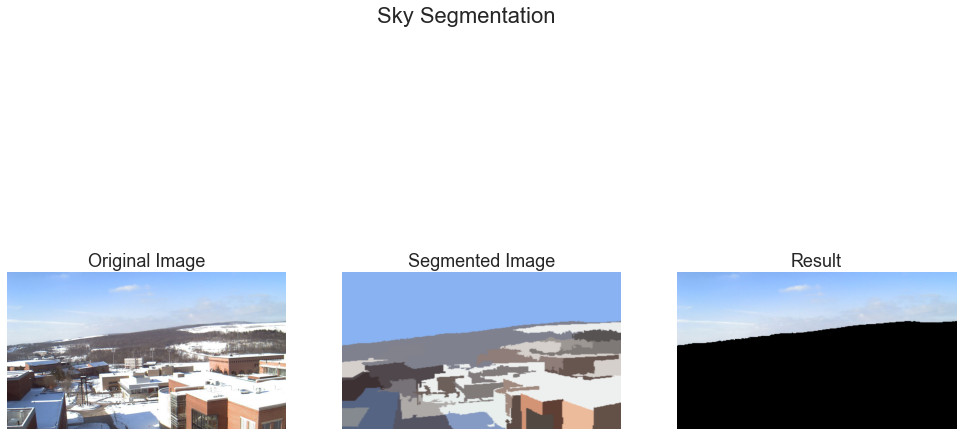

Precision: 0.9986144666995731
Recall: 0.9985452908119529
F1: 0.9985798775577358
------------------------------------------------------------------------------------------------------------------------


In [30]:
#show the scores for the highest score values
for i in results.sort_values(by=['score'], ascending=False).head(1).values:
    display_results(DATASET_FOLDER + "original\\" + i[3], baseline_mean_shift, print_mode = 'display' ,dataset_mode='validate', spatial_radius=i[5], range_radius=i[6], min_density=i[7])